# Théorie Financière

Master 1 Ingénierie des risques économiques et financiers

Université de Bordeaux

Nicolas Mauhé ([nicolas.mauhe@u-bordeaux.fr](mailto:nicolas.mauhe@u-bordeaux.fr))

## Fonctionnement du cours

### Programme

#### 1. Théorie moderne du portefeuille¶
#### 2. Evaluation par arbitrage
#### 3. Asset pricing (CAPM, APT, Fama-French)
#### 4. Efficacité des marchés financiers
#### 5. Options et produits dérivés

### Evaluation

Si on respecte le programme, évaluation en 10ème séance.

Sinon, un dossier à rendre.

### Python

L'outil du cours sera Python. Vous avez suivi un cours de Programmation au semestre 1 en C++ : Python est beaucoup plus facile d'accès que C++.

Pour construire les graphes, manipuler les modèles et les appliquer à des données réelles, il faut choisir un outil : Une calculatrice, Excel, VBA, etc.

L'avantage de Python est qu'il est simple d'accès et qu'il est utilisé de manière de plus en plus généralisée.

Format : Notebook Python ([Projet Jupyter](https://jupyter.org/))

Combine du code Python et du texte au format Markdown.

Chaque cellule de code peut-être lancée en utilisant le bouton "Run" ou en cliquant sur Ctrl+Entrée. Vous pouvez également lancer toutes les cellules d'un coup, ou toutes celles qui sont au-dessus/en-dessous. 

In [2]:
print("Bienvenue !")

Bienvenue !


Vous pouvez modifier et relancer les cellules à l'envi. N'hésitez pas à expérimenter ! Vous pouvez tout modifier, et enregistrer une copie de votre notebook.

In [3]:
a = 
print(a * a)

SyntaxError: invalid syntax (<ipython-input-3-327d84999a65>, line 1)

## Partie 1 : Théorie moderne du portefeuille

Références du cours:
- Bodie, Zvi. Investments. Tata McGraw-Hill Education, 2017.
- Hilpisch, Yves J. Python for finance. First edition. Sebastopol, CA: O’Reilly Media, 2015.
- Markowitz, Harry. « Portfolio Selection ». The Journal of Finance 7, nᵒ 1 (1952): 77‑91. 
- Tobin, James. « Liquidity preference as behavior towards risk ». The review of economic studies 25, nᵒ 2 (1958): 65–86.

On commence par importer les packages dont on va avoir besoin. Il s'agit des packages classiques dans l'utilisation de données, le calcul scientifique et la visualisation de graphes:
- [NumPy](http://www.numpy.org/) pour le calcul scientifique;
- [pandas](https://pandas.pydata.org/) pour la manipulation de jeux de données;
- [matplotlib](https://matplotlib.org/), plus précisèment [matplotlib.pyplot](https://matplotlib.org/api/pyplot_summary.html) pour la visualisation de graphes.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

On va paramétrer pyplot pour que la taille des graphes soit 15 cm sur 10cm.

In [5]:
plt.rcParams['figure.figsize'] = (15, 10)

### Quelques propriétés utiles

Rappelons quelques propriétés liées à la variance et la covariance, que nous utiliserons par la suite.

$$\mathrm{Var}(X) = \mathrm{E}[(X- \mathrm{E}[X])^2] = \mathrm{E}[X^2] - \mathrm{E}[X]^2$$

Propriétés

- $\forall c \in \mathbb{R}, \mathrm{Var}(c) = 0 $
- $\forall c \in \mathbb{R}, \mathrm{Var}(cX) = c^2*\mathrm{Var}(X)$
- $\forall c \in \mathbb{R}, \mathrm{Var}(X + c) = \mathrm{Var}(X)$

La covariance est définie par:

$$\mathrm{Cov}(X,Y) = \mathrm{E}[(X- \mathrm{E}[X])(Y- \mathrm{E}[Y])] = \mathrm{E}[XY] - \mathrm{E}[X]\mathrm{E}[Y]$$

On observe les propriétés suivantes:

- $\mathrm{Cov}(X,Y) = \mathrm{Cov}(Y,X)$
- $\mathrm{Var}(X) = \mathrm{Cov}(X,X)$
- $\mathrm{Cov}(aX, Z) = a\mathrm{Cov}(X,Z)$
- $\mathrm{Cov}(X + Y, Z) = \mathrm{Cov}(X,Z) + \mathrm{Cov}(Y,Z)$

On en déduit que :

$$\mathrm{Var}(X+Y) = \mathrm{Cov}(X+Y,X+Y)$$
$$\mathrm{Var}(X+Y) = \mathrm{Cov}(X,X) + \mathrm{Cov}(Y,Y) + 2\mathrm{Cov}(X,Y)$$
$$\mathrm{Var}(X+Y) = \mathrm{Var}(X) + \mathrm{Var}(Y) + 2\mathrm{Cov}(X,Y)$$

Rappelons également la formule du coefficient de corrélation:
$$ \mathrm{Corr}={\frac {\mathrm{Cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}$$

### Ligne d'allocation du capital

Le ratio de Sharpe : $$S(x) = \frac{R_x - r_f}{\sigma_x}$$
Avec $R_x$ étant le rendement de l'actif considéré, $r_f$ le rendement de l'actif sans risque et $\sigma_x$ l'écart-type du rendement considéré.
Le ratio de Sharpe mesure le surplus de rendement que vous obtenez en comparaison avec le risque que vous prenez.

Soit un portefeuille p avec une espérance de rendement $E(r_p)$ et un écart-type $\sigma_p$.

On dispose d'un actif sans risque proposant un rendement $r_f$ et, par définition, un écart-type nul.

On constitue un nouveau portefeuille composé de l'ancien et de l'actif sans risque. La décision se limite à fixer la proportion $y$ du capital allouée à l'ancien portefeuille, le reste étant alloué à l'actif sans risque.

On a les égalités suivantes:
$$E(r_c) = E(y*r_p + (1-y)*r_f)$$
$$E(r_c) = y*E(r_p) + (1-y)*E(r_f)$$
$$E(r_c) = y*E(r_p) + (1-y)*r_f$$

$$\mathrm{Var}(r_c) = \mathrm{Var}(y*r_p + (1-y)*r_f)$$
$$\mathrm{Var}(r_c) = y^2*\mathrm{Var}(r_p)$$
$$\sigma_c = y*\sigma_p$$

On cherche a représenter l'ensemble des portefeuille rendu possibles par les différents $y$ que l'on peut choisir. Compte-tenu du compromis rendement - risque habituel, on représentera le rendement en ordonnée et le risque en abscisse.

Text(0.5,0,'Risque (ecart-type)')

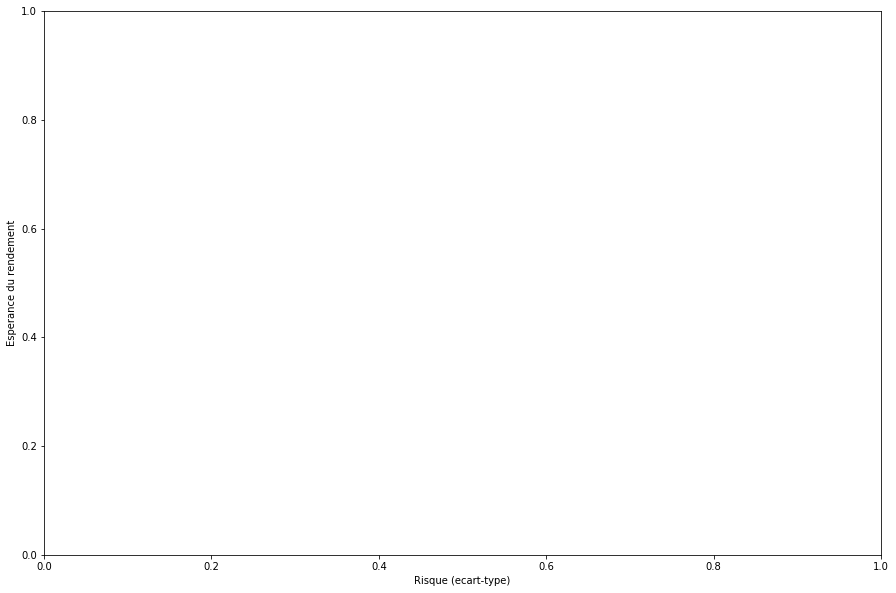

In [6]:
plt.ylabel('Esperance du rendement')
plt.xlabel('Risque (ecart-type)')

On cherche donc à obtenir une égalité du type $E(r_c) = f(\sigma_c)$, ce qui est rendu possible ici par le lien établi par $y$ entre rendement et risque.

On a :
$$y = \frac{\sigma_c}{\sigma_p}$$

La première égalité devient : 
$$E(r_c) =  \frac{\sigma_c}{\sigma_p}*E(r_p) + (1- \frac{\sigma_c}{\sigma_p})*r_f$$

Ce qui peut également s'écrire :
$$E(r_c) =  \frac{\sigma_c}{\sigma_p}*(E(r_p) - r_f) + r_f$$

On retombe donc sur une fonction affine du type :
$$E(r_c) =  a*{\sigma_c} + b$$
avec
$$a = \frac{E(r_p) - r_f}{\sigma_p}$$
$$b = r_f$$

On retrouve le ratio de Sharpe comme coefficient directeur de la droite.

Text(0.5,0,'Risque (ecart-type)')

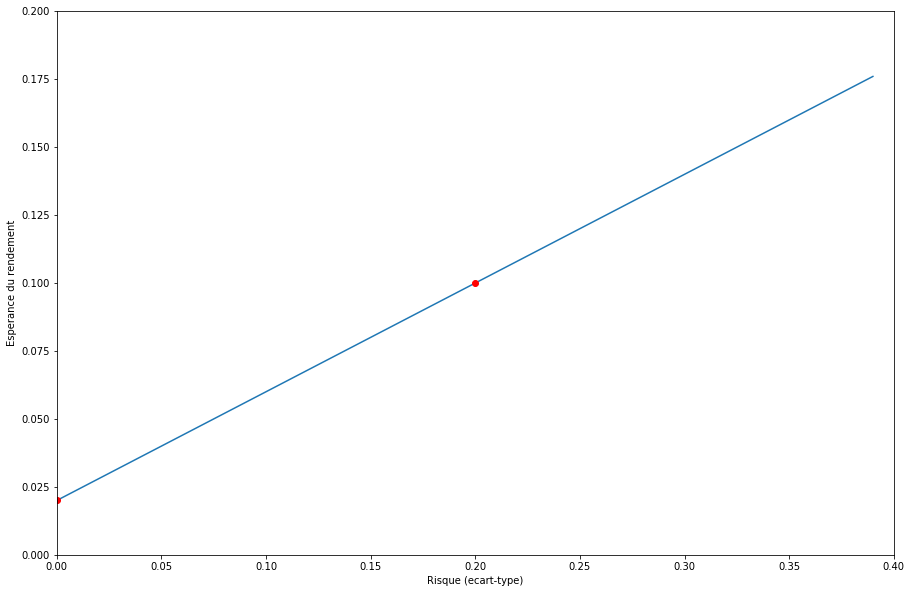

In [7]:
E_r_p = 0.10
r_f = 0.02
sigma_p = 0.20

a = (E_r_p - r_f) / sigma_p
b = r_f

sigma_p_list = np.arange(0.0, 2 * sigma_p, 0.01)
E_r_p_list = [a * x + b for x in sigma_p_list]

plt.plot(sigma_p_list, E_r_p_list)
plt.plot([0, sigma_p], [r_f, E_r_p], 'ro')

plt.axis([0, 2 * sigma_p, 0, 2 * E_r_p])
plt.ylabel('Esperance du rendement')
plt.xlabel('Risque (ecart-type)')

On obtient donc une allocation du capital vers le portefeuille d'autant plus intéressante que le ratio de Sharpe est élevé : pour une unité de risque consentie en plus (ici exprimée en écart-type), le rendement obtenu sera d'autant plus élevé que le ratio de Sharpe est important. Cela constitue une intéressante interprétation graphique du ratio de Sharpe: il s'agit du gain marginal obtenu en allouant plus de capital vers le portefeuille en question (plutôt que vers l'actif sans risque), et ce en concédant 1 écart-type supplémentaire.

### Aversion au risque et fonction d'utilité

Il est possible de définir l'allocation optimale entre l'actif sans risque et le portefeuille $p$ si l'on a une mesure précise de l'aversion au risque de l'investisseur. 
Une telle mesure nécessite doit représenter le compromis entre risque et rendement: la satisfaction de l'investisseur doit être une fonction positive du rendement et une fonction négative du risque. Si l'on maintient la satisfaction à un niveau fixe, toute augmentation du risque doit s'accompagner d'une augmentation du rendement pour maintenir le niveau de satisfaction égal.

Une mesure habituelle répondant à ces critères est la fonction d'utilité quadratique:

$$U = E(r_p) - A*\sigma_p^2$$

Si l'on maintient U à un niveau constant, on peut exprimer $E(r_p)$ en fonction de $\sigma_p$:

$$E(r_p)= U + A*\sigma_p^2$$

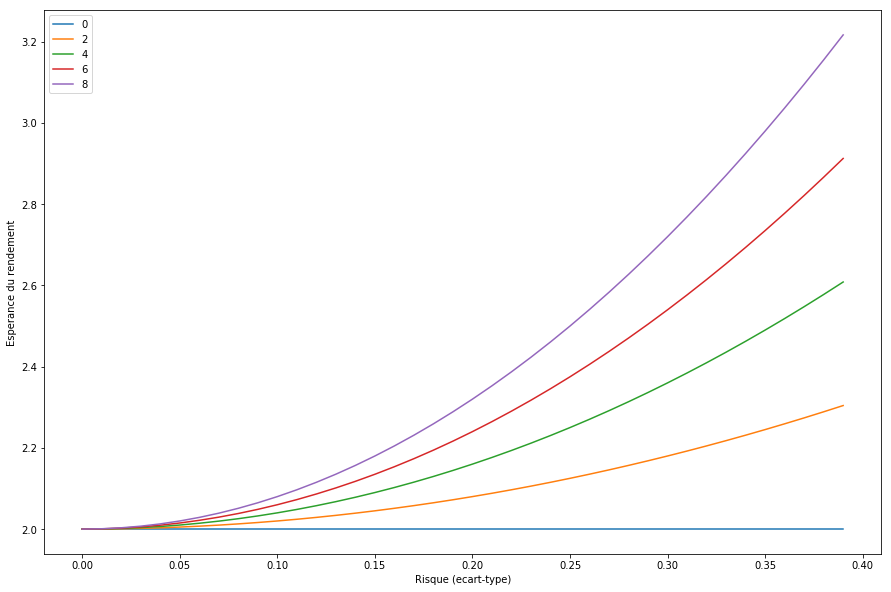

In [12]:
U = 2
for A_n in np.arange(0, 10, 2):
    A_n_list = [U + A_n * x ** (2) for x in sigma_p_list]
    plt.plot(sigma_p_list, A_n_list, label=A_n)
    
plt.ylabel('Esperance du rendement')
plt.xlabel('Risque (ecart-type)')
plt.legend()

Cela répond bien à la nécessité de l'investisseur d'être averse au risque : la courbe est croissante, convexe. Mathématiquement, cela correspond au fait que l'on a la dérivée suivante:

$$\frac{dE(r)}{d\sigma} = 2A*\sigma$$

On observe que cette dérivée est strictement supérieure à 0 dès lors que A et $\sigma$ sont supérieurs à 0. Pour obtenir un lien direct entre cette dérivée et le coefficient A, il est conventionnel d'écrire la fonction d'utilité de la forme:

$$E(r_p)= U + \frac12*A*\sigma_p^2$$

De sorte que l'on a $$\frac{dE(r)}{d\sigma} = A*\sigma$$ et $$\frac{d^2E(r)}{d\sigma^2} = A$$ On observe alors qu'un coefficient d'aversion au risque supérieur à 0 signifie que la courbe est convexe, et donc que l'investisseur est averse au risque. Un coefficient égal a 0 signifie qu'il est insensible (ou neutre) au risque, tandis qu'un coefficient inférieur à 0 signifie qu'il l'apprécie.

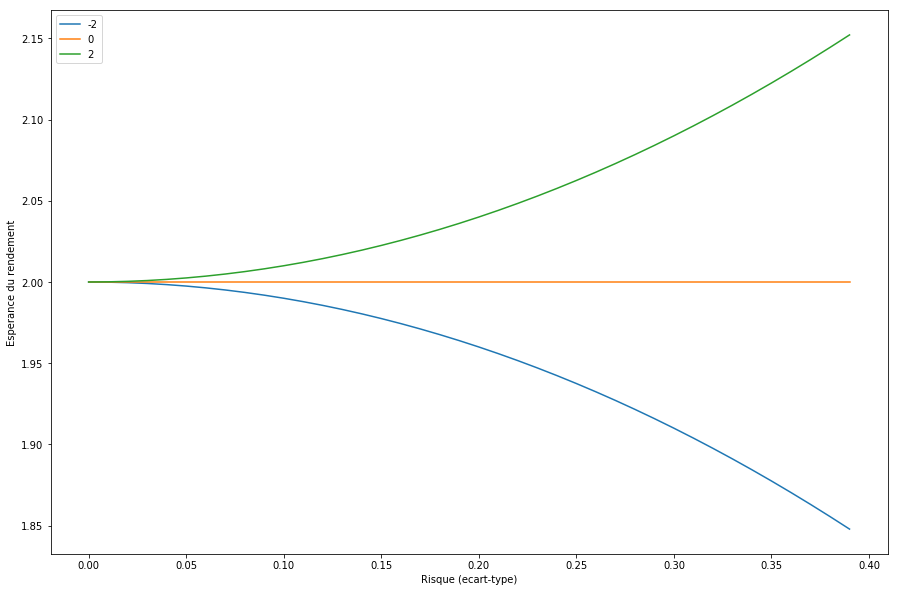

In [13]:
for A_n in np.arange(-2, 4, 2):
    A_n_list = [U + 0.5 * A_n * x ** (2) for x in sigma_p_list]
    plt.plot(sigma_p_list, A_n_list, label=A_n)

plt.ylabel('Esperance du rendement')
plt.xlabel('Risque (ecart-type)')
plt.legend()

Il existe plusieurs méthodes d'estimation du coefficient d'aversion au risque d'un investisseur: les plus utilisés sont l'administration d'un questionnaire et l'analyse économétrique de ses choix d'investissements passés.

On peut également fixer A et considérer différent niveaux d'utilité:

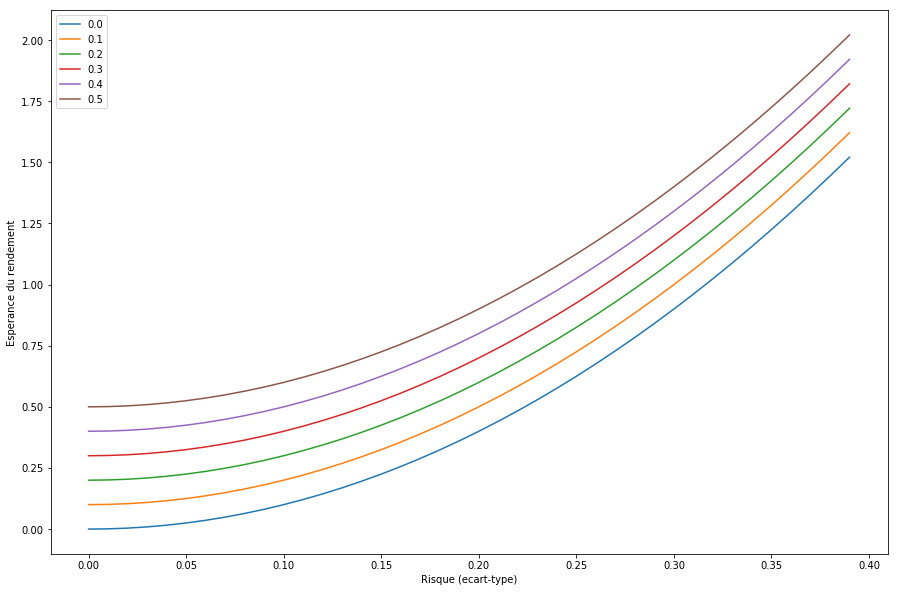

In [14]:
A_n = 10
for U in np.arange(0, 0.6, 0.1):
    U_list = [U + A_n * x ** (2) for x in sigma_p_list]
    plt.plot(sigma_p_list, U_list, label=U)

plt.ylabel('Esperance du rendement')
plt.xlabel('Risque (ecart-type)')
plt.legend()

### Allocation optimale

On peut comparer la courbe d'indifférence et la droite d'allocation du capital pour établir l'allocation optimale du capital entre l'actif sans risque et le portefeuille $p$ selon le degré d'aversion au risque de l'investisseur.

Text(0.5,0,'Risque (ecart-type)')

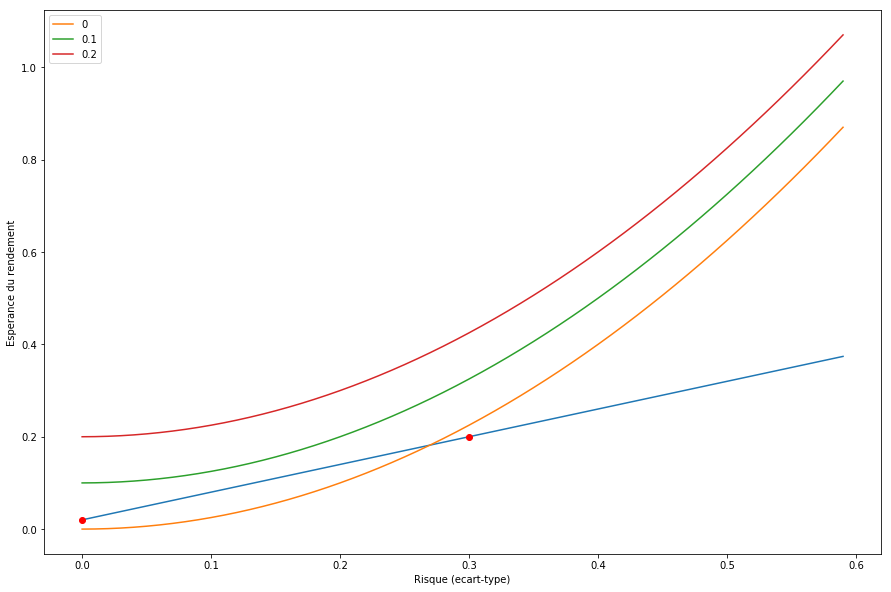

In [20]:
U_1 = 0
U_2 = 0.1
U_3 = 0.2

A_n = 5

E_r_p = 0.20
r_f = 0.02
sigma_p = 0.30

sigma_p_list = np.arange(0.0, 2 * sigma_p, 0.01)
E_r_p_list = [((E_r_p - r_f) / sigma_p) * x + r_f for x in sigma_p_list]

U_1_courbe = [U_1 + 0.5 * A_n * x ** 2 for x in sigma_p_list]
U_2_courbe = [U_2 + 0.5 * A_n * x ** 2 for x in sigma_p_list]
U_3_courbe = [U_3 + 0.5 * A_n * x ** 2 for x in sigma_p_list]

plt.plot(sigma_p_list, E_rp_list)
plt.plot(sigma_p_list, U_1_courbe, label=U_1)
plt.plot(sigma_p_list, U_2_courbe, label=U_2)
plt.plot(sigma_p_list, U_3_courbe, label=U_3)
plt.plot([0, sigma_p], [r_f, E_r_p], 'ro')

plt.legend()
plt.ylabel('Esperance du rendement')
plt.xlabel('Risque (ecart-type)')

Il existe donc une allocation entre l'actif sans risque et le portefeuille $p$ qui permet le niveau maximal d'utilité: cette allocation correspond au niveau d'utilité U et au point $\sigma$ pour lesquels la droite d'allocation est la tangeante de la courbe d'indifférence associée au niveau d'utilité U .

Mathématiquement, si l'on connait l'actif sans risque, le portefeuille $p$ et l'aversion au risque $A_n$ de l'investisseur $n$, on peut trouver le niveau d'utilité maximum atteignable (et le portefeuille $p^*$ qui le permet) en étudiant l'égalité suivante:

$$U_{p^*} + \frac12*A_n*\sigma_{p^*}^2 = \frac{E(r_p) - r_f}{\sigma_p}\sigma_{p^*} + r_f $$

Que l'on peut écrire sous la forme classique d'une équation du second degré, la variable ici étant $\sigma_{p^*}$ :

$$ - \frac12*A_n*\sigma_{p^*}^2 + \frac{E(r_p) - r_f}{\sigma_p}\sigma_{p^*} + r_f - U_{p^*} = 0$$

Il est possible de fixer U au niveau que l'on souhaite avant de chercher le ou les $\sigma_{p^*}$ qui permettent d'obtenir cette égalité. On va donc fixer U de sorte que le déterminant soit nul:

$$\Delta =  b^2 - 4ac = 0$$

$$(\frac{E(r_p) - r_f}{\sigma_p})^2 - 4 (- \frac12*A_n)(r_f - U_{p^*})=0$$
$$(\frac{E(r_p) - r_f}{\sigma_p})^2 +2A_n*r_f - 2A_n*U_{p^*}=0$$
$$(\frac{E(r_p) - r_f}{\sigma_p})^2 +2A_n*r_f = 2A_n*U_{p^*}$$
$$\frac{(\frac{E(r_p) - r_f}{\sigma_p})^2}{2A_n} +r_f = U_{p^*}$$

On peut donc fixer U dès lors que $A_n$ et $\sigma_p$ sont différents de 0. On reconnaît au passage le ratio de Sharpe.

In [96]:
Sharpe_ratio = (E_r_p - r_f) / sigma_p
U_p_etoile = (Sharpe_ratio ** 2 ) / (2 * A_n) + r_f
print(U_p_etoile)

0.09192013606


Il ne reste plus qu'à trouver $\sigma_{p^*}$:

$$\sigma_{p^*} = \frac{-b}{2a} = \frac{\frac{E(r_p) - r_f}{\sigma_p}}{A_n}$$

La encore, on retrouve le ratio de Sharpe.

In [24]:
sigma_p_etoile = Sharpe_ratio / A_n
print(sigma_p_etoile)

0.12000000000000002


Le rendement associé nous est donné par l'équation de la droite d'allocation du capital:

$$E(r_{p^*})=\frac{E(r_p) - r_f}{\sigma_p}\sigma_{p^*} + r_f $$

In [30]:
E_r_p_etoile = Sharpe_ratio * sigma_p_etoile + r_f
print(E_r_p_etoile)

0.09200000000000003


Il ne reste plus qu'à utiliser ces valeurs pour changer un peu le graphique vu précédemment :

Text(0.5,0,'Risque (ecart-type)')

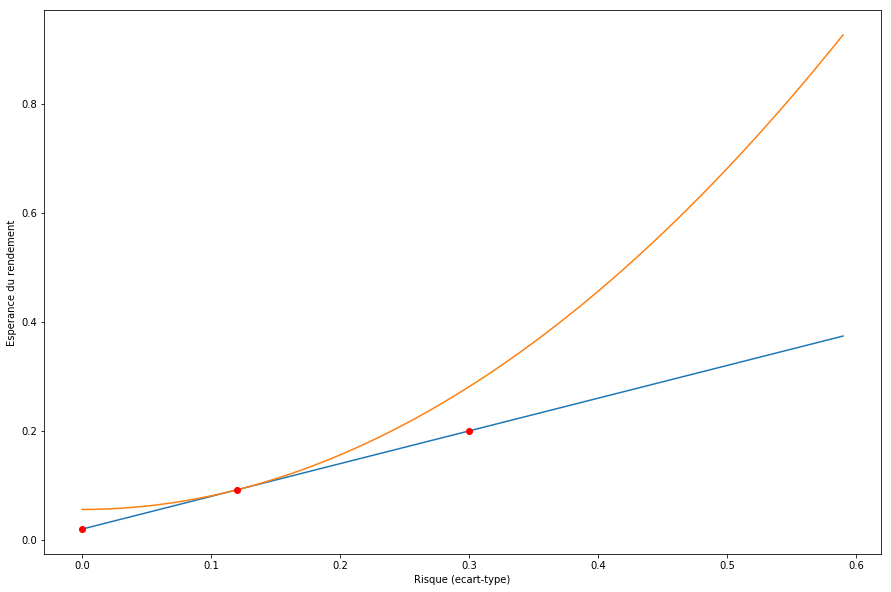

In [32]:
U_p_etoile_courbe = [U_p_etoile + 0.5 * A_n * x ** 2 for x in sigma_p_list]

plt.plot(sigma_p_list, E_rp_list)
plt.plot(sigma_p_list, U_p_etoile_courbe)
plt.plot([0, sigma_p, sigma_p_etoile], [r_f, E_r_p, E_r_p_etoile], 'ro')

plt.ylabel('Esperance du rendement')
plt.xlabel('Risque (ecart-type)')

En déça du point de croisement entre les deux courbes, le portefeuille ne satisfait pas l'investisseur car le rendement est trop faible: au delà, le risque est trop élevé. Le portefeuille $p^*$ correspond exactement au compromis risque-rendement recherché par l'investisseur.

Si l'investisseur désire un niveau de risque supérieur au portefeuille $p$, on entre dans les solutions utilisant du "levier" (*leverage*), c'est à dire des solutions qui empruntent de l'argent pour investir dans le portefeuille P.

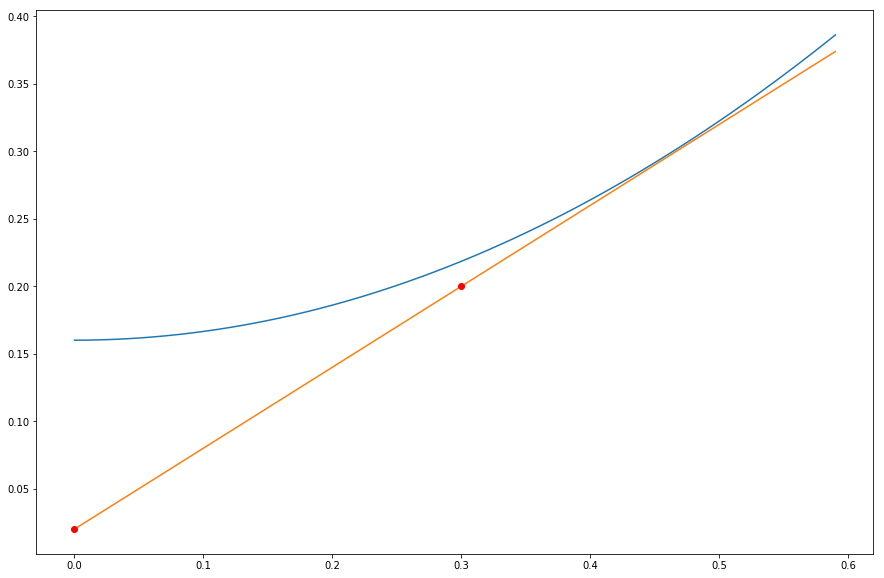

In [35]:
A_n = 1.3
U_1 = 0.16

U_1_courbe = [U_1 + 0.5 * A_n * x ** 2 for x in sigma_p_list]

plt.plot(sigma_p_list, U_1_courbe)
plt.plot(sigma_p_list, E_rp_list)
plt.plot([0, sigma_p], [rf, E_rp], 'ro')

Pour les solutions avec levier, si l'on suppose que le taux à lequel on peut emprunter est le taux sans risque, alors l'espérance de rendement est toujours:
$$E(r_c) = y*E(r_p) + (1-y)*r_f$$
Or comme $y$ est supérieur à $1$, $1-y$ devient négatif, et $(1-y)*r_f$ devient alors le poids de la dette sur le rendement.
Dans ces conditions la droite d'allocation du capital conserve le même coefficient directeur au delà du point représentant $p$: en réalité on emprunte nécessairement à un taux supérieur à l'actif sans risque, la demi-droite d'après $p$ s'aplatit donc, voire devient une courbe concave si le taux d'emprunt augmente avec le montant emprunté.

Limites : ces analyses supposent que les rendements sont normalement distribués, et donc que le risque peut-être caractérisé par l'écart-type.

### Diversification : le cas simple avec deux actifs

Considérons deux actifs, l'un composé d'obligations et l'autre d'actions. On va s'intéresser à la diversification de notre portefeuille entre obligations et actions, une problématique assez classique.

Le portefeuille se répartit donc entre les deux actifs, dont les rendements respectifs de $r_D$ et $r_E$ sont des variables aléatoires normalement distribuées, avec des écart-types respectifs de $\sigma_D$ et $\sigma_E$. Le poids du portefeuille dans chaque type d'actif est $w_D$ et $w_E$, la somme des poids étant égale à 1. La covariance des deux rendements est $\mathrm{Cov}(r_D, r_E)$.

Le rendement du portefeuille $r_p$ sera:
$$r_p = w_D*r_D + w_E*r_E $$

Compte-tenu des propriétés de l'espérance mathématique, nous avons donc l'égalité suivante :
$$E(r_p) = w_D*E(r_D) + w_E*E(r_E) $$

Compte-tenu des propriétés établies sur la variance, nous pouvons établir que :
$$\mathrm{Var}(r_p) = w_D^2*\mathrm{Var}(r_D) + w_E^2*\mathrm{Var}(r_E) + 2w_D*w_E*\mathrm{Cov}(r_D, r_E)$$

$$\sigma_p^2 = w_D^2*\sigma_D^2 + w_E^2*\sigma_E^2 + 2w_D*w_E*\mathrm{Cov}(r_D, r_E)$$

On observe que l'écart-type du portefeuille n'est pas égale à la somme pondérée des écart-types des actifs qui le composent; il est d'ailleur inférieur ou égal à la somme pondérée. Ce qui donne un indice sur l'intérêt de la diversification en termes de risque.

On peut représenter le risque du poids du portefeuille dans l'actif E pour une représentation graphique du phénomène. On repart de cette égalité:

$$\sigma_p^2 = w_D^2*\sigma_D^2 + w_E^2*\sigma_E^2 + 2w_D*w_E*\mathrm{Cov}(r_D, r_E)$$
$$\sigma_p^2 = (1-w_E)^2*\sigma_D^2 + w_E^2*\sigma_E^2 + 2(1-w_E)*w_E*\mathrm{Cov}(r_D, r_E)$$

Ce qui peut s'écrire sous la forme :

$$\sigma_p = \sqrt{w_E^2(\sigma_D^2 + \sigma_E^2 - 2\mathrm{Cov}(r_D, r_E)) + w_E(-2\sigma_D^2+2\mathrm{Cov}(r_D, r_E)) + \sigma_D^2}$$

On peut utiliser cette égalité pour tracer l'évolution du risque selon la diversification entre les deux actifs, pour un niveau de corrélation fixé.

Text(0,0.5,'Ecart-type du portefeuille p')

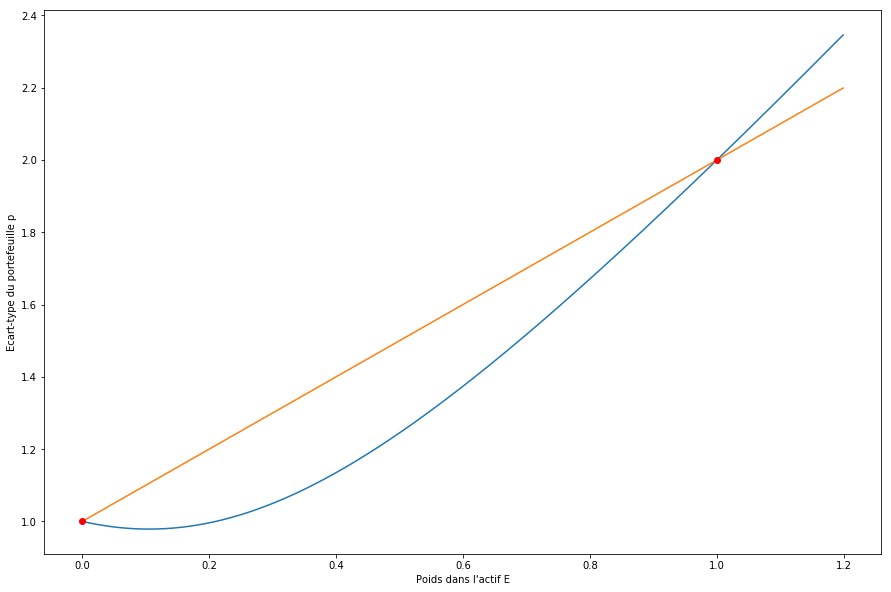

In [36]:
corr = 0.3

sigma_d = 1
sigma_e = 2

cov = corr * sigma_d * sigma_e
x_list = np.arange(0, 1.2, 0.001)

sigma_p_list = [np.sqrt((x**2)*(sigma_d**2 + sigma_e**2 - 2*cov) + x*(-2*sigma_d**2 + 2*cov) + sigma_d**2) 
                for x in x_list]
sigma_weighted_average = [(1 - x) * sigma_d + x * sigma_e for x in x_list]

plt.plot(x_list, sigma_p_list)
plt.plot(x_list, sigma_weighted_average)
plt.plot([0, sigma_d], [1, sigma_e], 'ro')

plt.xlabel("Poids dans l'actif E")
plt.ylabel("Ecart-type du portefeuille p")

On observe le bénéfice sur le risque de la diversification. On peut faire varier le coefficient de corrélation et observer le bénéfice lié. Attention, la corrélation impacte également le rendement ! Impossible d'avoir deux actifs avec des rendements positifs et une corrélation de -1...

On peut utiliser l'égalité obtenue pour obtenir le rendement en fonction du risque, mais cette fois avec nos deux actifs.

Text(0,0.5,'Rendement attendu (%)')

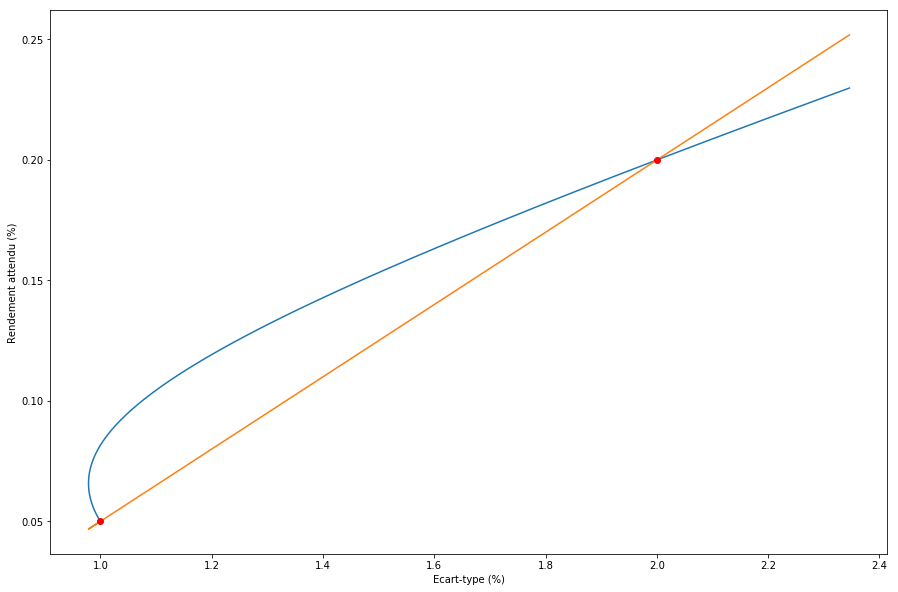

In [37]:
E_d = 0.05
E_e = 0.20

E_p_list = [(1 - x) * E_d + x * E_e for x in x_list]
E_weighted_average = [(1 - (x - sigma_d)) * E_d + (x - sigma_d) * E_e for x in sigma_p_list]

plt.plot(sigma_p_list, E_p_list)
plt.plot(sigma_p_list, E_weighted_average)
plt.plot([sigma_d, sigma_e], [E_d, E_e], 'ro')
plt.xlabel("Ecart-type (%)")
plt.ylabel("Rendement attendu (%)")

Il est possible de faire varier le coefficient de correlation pour comparer les resultats.

### Deux actifs risqués et un actif sans risque

Ajoutons maintenant la possibilité de choisir entre un actif sans risque (de rendement $r_f$ et d'écart-type nul) et nos deux actifs $r_e$ et $r_d$. Cela revient à choisir une proportion de $r_e$ vs $r_d$, puis une proportion entre l'actif sans risque et le portefeuille constitué.
Cela revient donc à combiner les deux analyses précédentes.

Choisissons une répartition entre E et D au hasard (disons 30% d'actions et 70% d'obligations), puis traçons la droite d'allocation du capital.

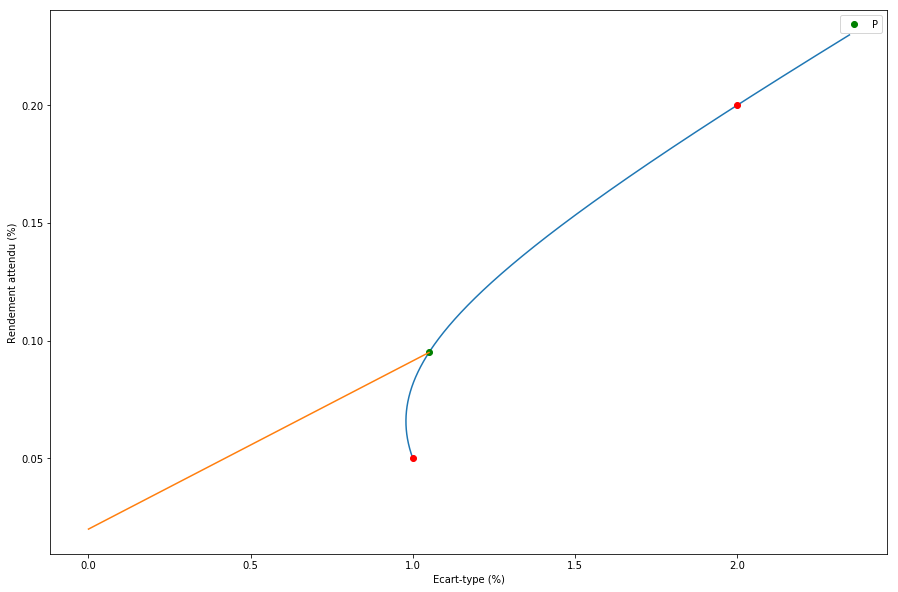

In [38]:
w_e = 0.3

E_p = (1 - w_e) * E_d + w_e * E_e
sigma_p = np.sqrt((w_e**2)*(sigma_d**2 + sigma_e**2 - 2*cov) + w_e*(-2*sigma_d**2 + 2*cov) + sigma_d**2)

plt.plot(sigma_p_list, E_p_list)
plt.plot([sigma_d, sigma_e], [E_d, E_e], 'ro')
plt.plot([sigma_p], [E_p], 'ro', label='P', color="green")
plt.plot([0, sigma_p], [rf, E_p])
plt.xlabel("Ecart-type (%)")
plt.ylabel("Rendement attendu (%)")
plt.legend()

Il reste a déterminer la meilleure allocation entre actif sans risque et portefeuille actions/obligations, celle qui corresponde à l'aversion au risque de l'investisseur.

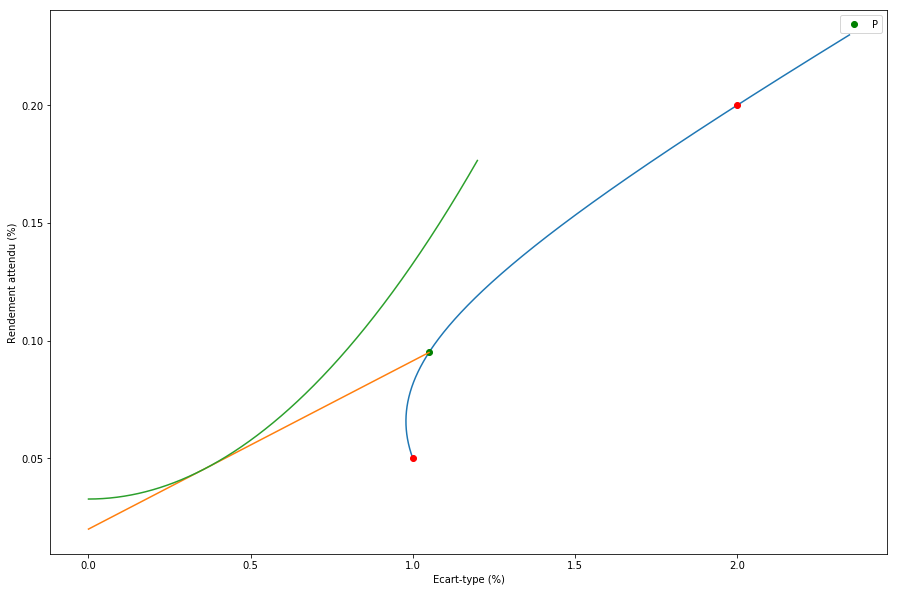

In [40]:
A_n = 0.2

U_p_etoile = (((E_p - r_f) / sigma_p) ** 2 ) / (2 * A_n) + r_f
U_courbe = [U_p_etoile + 0.5 * A_n * x ** 2 for x in x_list]

plt.plot(sigma_p_list, E_p_list)
plt.plot([sigma_d, sigma_e], [E_d, E_e], 'ro')
plt.plot([sigma_p], [E_p], 'ro', label='P', color="green")
plt.plot([0, sigma_p], [r_f, E_p])
plt.plot(x_list, U_courbe)
plt.xlabel("Ecart-type (%)")
plt.ylabel("Rendement attendu (%)")
plt.legend()

Trouver le portefeuille optimal devient donc un problème d'optimisation qui consiste à trouver la bonne répartition entre les deux actifs risqués, puis trouver la bonne allocation de capital entre l'actif sans risque et le portefeuille constitué.

Le théorème de séparation de Tobin (Tobin, James. « Liquidity preference as behavior towards risk », 1958) nous dit que ce problème d'optimisation peut-être séparé en deux étapes:
- Trouver l'allocation entre les deux actifs risqués qui maximise le ratio de Sharpe (= le coefficient directeur de la droite d'allocation du capital)
- Trouver l'allocation optimale entre actif sans risque et portefeuille constitué à l'étape 1, selon le degré d'aversion au risque de l'investisseur.

De fait, ce principe va à l'encontre de l'habitude des conseiller en investissements de constituer un portefeuille d'actions / obligations différent selon l'aversion au risque de l'investisseur.
Le principe de séparation et la diversification nous montre qu'il existe un portefeuille optimal quelque soit l'aversion au risque de l'investisseur. On ajuste ensuite le degré de risque en panachant avec de l'actif sans risque.

### Optimisation sous Python

Premiere étape: définir la fonction a maximiser, ici le ratio de Sharpe. Pour être précis, on va minimiser l'opposé du ratio de Sharpe.

$$Max_{w_E\in[0,1]} \frac{R_x - r}{\sigma_x}$$
ou
$$Min_{w_E\in[0,1]} -\frac{R_x - r}{\sigma_x}$$

In [42]:
def min_sharpe(w_e):
    sigma_p = np.sqrt((w_e**2)*(sigma_d**2 + sigma_e**2 - 2*cov) + w_e*(-2*sigma_d**2 + 2*cov) + sigma_d**2)
    E_p = (1 - w_e) * E_d + w_e * E_e
    return -(E_p - r_f) / sigma_p

print(min_sharpe(w_e))

-0.0714447738948


On va utiliser le package [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html), et plus précisèment la méthode [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

In [43]:
import scipy.optimize

opts = scipy.optimize.minimize(min_sharpe, 0)

print(opts)

      fun: -0.0900549282923309
 hess_inv: array([[ 37.745436]])
      jac: array([ -2.09547579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([ 0.9310264])


On récupère la valeur optimale de $w_E$, on calcule l'allocation optimale entre l'actif sans risque et le portefeuille constitué.

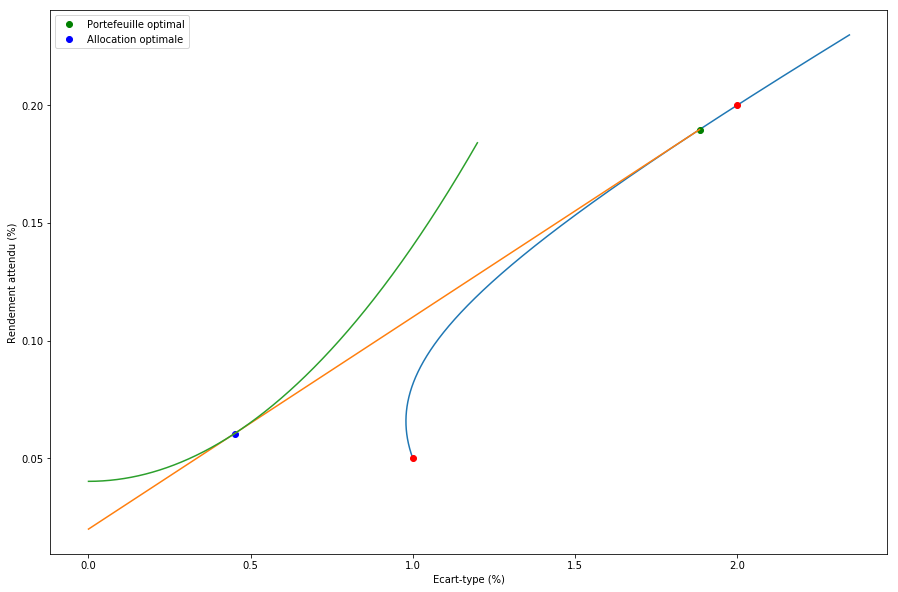

In [47]:
w_e = opts['x']

E_p = (1 - w_e) * E_d + w_e * E_e
sigma_p = np.sqrt((w_e**2)*(sigma_d**2 + sigma_e**2 - 2*cov) + w_e*(-2*sigma_d**2 + 2*cov) + sigma_d**2)

Sharpe_ratio = (E_p - r_f) / sigma_p
U_p_etoile = (Sharpe_ratio ** 2 ) / (2 * A_n) + rf
sigma_p_etoile = Sharpe_ratio / A_n
E_p_etoile = Sharpe_ratio * sigma_p_etoile + r_f
U_courbe = [U_p_etoile + 0.5 * A_n * x ** 2 for x in x_list]

plt.plot(sigma_p_list, E_p_list)
plt.plot([sigma_d, sigma_e], [E_d, E_e], 'ro')
plt.plot([sigma_p], [E_p], 'ro', label='Portefeuille optimal', color="green")
plt.plot([sigma_p_etoile], [E_p_etoile], 'ro', label='Allocation optimale', color="blue")
plt.plot([0, sigma_p], [r_f, E_p])
plt.plot(x_list, U_courbe)
plt.xlabel("Ecart-type (%)")
plt.ylabel("Rendement attendu (%)")
plt.legend()

On peut vérifier sommairement qu'il s'agit de la bonne solution:

In [48]:
for w_e in np.arange(0, 1, 0.01):
    print(str(w_e) + " : " + str(-min_sharpe(w_e)))

0.0 : 0.03
0.01 : 0.0316207052703
0.02 : 0.0332415463822
0.03 : 0.0348605801998
0.04 : 0.0364758303862
0.05 : 0.0380852982563
0.06 : 0.0396869741747
0.07 : 0.0412788493597
0.08 : 0.0428589279392
0.09 : 0.0444252390994
0.1 : 0.0459758491562
0.11 : 0.0475088733813
0.12 : 0.0490224874151
0.13 : 0.0505149381065
0.14 : 0.0519845536287
0.15 : 0.0534297527364
0.16 : 0.0548490530457
0.17 : 0.0562410782393
0.18 : 0.0576045641218
0.19 : 0.0589383634724
0.2 : 0.0602414496677
0.21 : 0.0615129190696
0.22 : 0.0627519921979
0.23 : 0.0639580137248
0.24 : 0.0651304513524
0.25 : 0.066268893646
0.26 : 0.0673730469122
0.27 : 0.0684427312209
0.28 : 0.0694778756769
0.29 : 0.0704785130529
0.3 : 0.0714447738948
0.31 : 0.0723768802128
0.32 : 0.0732751388652
0.33 : 0.0741399347379
0.34 : 0.0749717238178
0.35 : 0.0757710262461
0.36 : 0.076538419433
0.37 : 0.0772745313034
0.38 : 0.0779800337332
0.39 : 0.0786556362299
0.4 : 0.0793020798957
0.41 : 0.0799201317088
0.42 : 0.0805105791466
0.43 : 0.0810742251663
0.44 :

### Avancé : la corrélation ne fait pas tout

Pour prendre en compte l'effet de la corrélation sur les revenus (et comment ils évoluent conjointement), on peut construire quelque chose plus complet.

Fixons le revenu attendu de E, son écart-type, et créons D de la manière suivante : 
$$r_D = (a * r_E + (1-|a|)*r_X)$$
Avec $r_X$ suivant une loi normale d'écart-type $\sigma_X$ et d'espérance fixée, $r_X$ et $r_E$ sont indépendantes.

Cela revient à dire que $r_D$ est constitué en partie de $r_E$, et en partie d'une composante aléatoire indépendante de $r_E$.
Comme on s'y attend, le coefficient de corrélation entre $r_X$ et $r_D$ est lié au coefficient a:

$$\mathrm{Corr}(r_D, r_E) = \frac{\mathrm{Cov}(r_D, r_E)}{\sigma_D\sigma_E}$$
$$\mathrm{Corr}(r_D, r_E) = \frac{\mathrm{Cov}(a * r_E + (1-|a|)*r_X, r_E)}{\sigma_D\sigma_E}$$
$$\mathrm{Corr}(r_D, r_E) = \frac{a*\mathrm{Cov}(r_E, r_E)}{\sigma_D\sigma_E}$$
$$\mathrm{Corr}(r_D, r_E) = \frac{a*\sigma_E^2}{\sigma_D\sigma_E}$$
$$\mathrm{Corr}(r_D, r_E) = \frac{a*\sigma_E}{\sigma_D}$$

$$\sigma_D^2 = \mathrm{Cov}(r_D, r_D) = \mathrm{Cov}(a * r_E + (1-|a|)*r_X, a * r_E + (1-|a|)*r_X)$$
$$\sigma_D^2 = a^2 * \sigma_E^2 + (1-|a|)^2 * \sigma_X^2$$
d'où
$$\mathrm{Corr}(r_D, r_E) = \frac{a*\sigma_E}{\sqrt{a^2 * \sigma_E^2 + (1-|a|)^2 * \sigma_X^2}}$$

En python cela donne le code vu précédemment, avec quelques modifications :

In [49]:
E_e = 0.20
sigma_e = 0.2
E_x = 0.10
sigma_x = 0.1

a = 0.2

E_d = (a * E_e + (1 - np.abs(a)) * E_x)
sigma_d = np.sqrt((a * sigma_e) ** 2 + ((1 - np.abs(a)) * sigma_x) ** 2)

corr = a * sigma_e / sigma_d

print(E_d)
print(sigma_d)
print(corr)

0.12
0.0894427191
0.4472135955


Text(0,0.5,'Rendement attendu (%)')

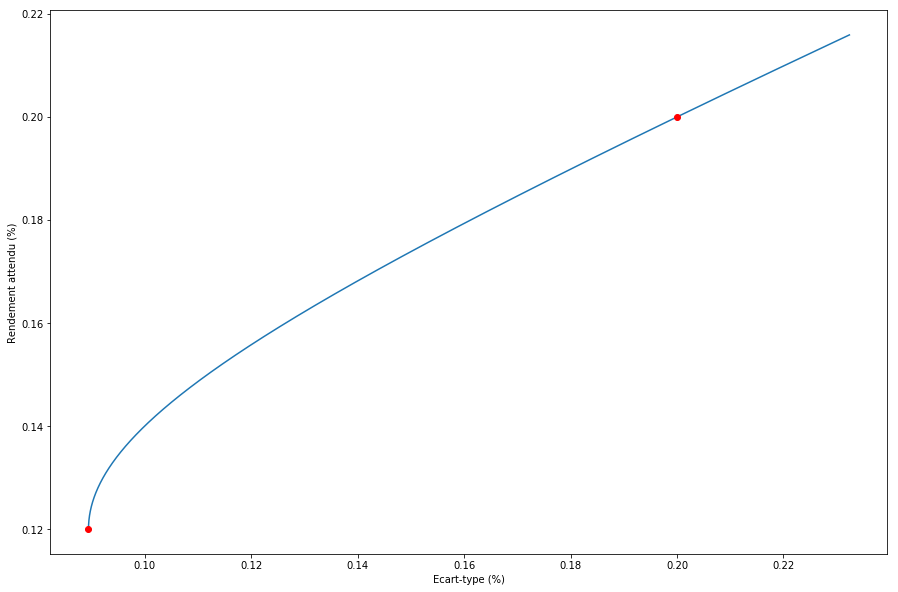

In [50]:
cov = corr * sigma_d * sigma_e

x_list = np.arange(0, 1.2, 0.001)
sigma_p_list = [np.sqrt((x**2)*(sigma_d**2 + sigma_e**2 - 2*cov) + x*(-2*sigma_d**2 + 2*cov) + sigma_d**2) 
                for x in x_list]
E_p_list = [(1 - x) * E_d + x * E_e for x in x_list]

E_weighted_average = [(1 - (x - sigma_d)) * E_d + (x - sigma_d) * E_e for x in sigma_p_list]

plt.plot(sigma_p_list, E_p_list)
#plt.plot(sigma_p_list, E_weighted_average)
plt.plot([sigma_d, sigma_e], [E_d, E_e], 'ro')
plt.xlabel("Ecart-type (%)")
plt.ylabel("Rendement attendu (%)")

On peut comparer plusieurs niveaux de corrélation en faisant une boucle.

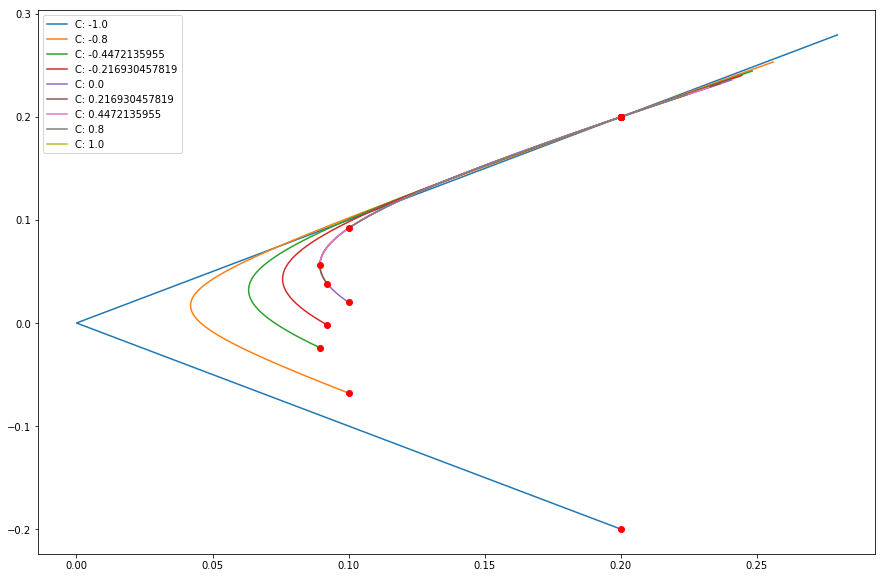

In [51]:
E_e = 0.20
sigma_e = 0.2
E_x = 0.02
sigma_x = 0.1

for a in [-1, -0.4, -0.2, -0.1, 0, 0.1, 0.2, 0.4, 1]:
    
    E_d = (a * E_e + (1 - np.abs(a)) * E_x)
    sigma_d = np.sqrt((a * sigma_e) ** 2 + ((1 - np.abs(a)) * sigma_x) ** 2)
    corr = a * sigma_e / sigma_d
    cov = corr * sigma_d * sigma_e

    sigma_p_list = [np.sqrt((x**2)*(sigma_d**2 + sigma_e**2 - 2*cov) + x*(-2*sigma_d**2 + 2*cov) + sigma_d**2) 
                    for x in x_list]
    E_p_list = [(1 - x) * E_d + x * E_e for x in x_list]

    plt.plot(sigma_p_list, E_p_list, label="C: " + str(corr))
    plt.plot([sigma_d, sigma_e], [E_d, E_e], 'ro')
plt.legend()

Conclusion : le coefficient de corrélation seul ne garantit pas la qualité de la diversification offerte par un actif supplémentaire. Un actif avec différents niveau de corrélation mais la meme source "d'altérité" apportera des bienfaits similaires, quel que soit le niveau de corrélation (le bienfait apporté pourra varier légèrement en fonction de l'aversion au risque de l'investisseur). 

Lors de la recherche d'actifs pour la diversification d'un portefeuille, il ne faut donc pas être uniquement préoccupé par la corrélation mathématique, mais se poser la question de ce qu'apporte l'actif supplémentaire en termes de différence, et donc de réduction du risque.

Cela onstitue également un avertissement concernant le "model risk" : notre premier modèle, très simple, semblait pousser vers des niveaux de corrélation faibles voire négatifs. Un modèle un petit peu plus recherché montre que la réalité n'est pas si simple.

### Diversification : le cas général

On a désormais affaire à des vecteurs aléatoires. Il y a $n$ actifs disponibles en plus de l'actif sans risque, et chaque actif $i$ aura un rendement $r_i$. Pour l'heure, nous considérons l'espérance du rendement $\mathrm{E}(r_I)$. On peut considérer ces éléments de manière matricielle. $\mu$ est le vecteur des rendements considérés :

$$
\mu = \left( \begin{array}{c}
\mathrm{E}(r_1) \\
\mathrm{E}(r_2) \\
\vdots \\
\mathrm{E}(r_n) \\
\end{array} \right)
$$

Ces rendements ne sont pas nécessairement indépendants, on utilisera donc la matrice de covariance $\Sigma$ pour analyser le lien entre eux :

$$
\Sigma =  \left( \begin{array}{cccc}
\sigma_{{1}}^{2} & \sigma_{{1}{2}} & \cdots & \sigma_{{1}{n}} \\
\sigma_{{1}{2}} & \sigma_{{2}}^{2} & \cdots & \sigma_{{2}{n}} \\
\vdots             & \vdots              & \ddots & \vdots \\
\sigma_{{1}{n}} & \sigma_{{2}{n}} & \cdots & \sigma_{{n}}^{2}
\end{array} \right)
$$

... avec $\sigma_{ij} = cov(r_i, r_j)$.

On a vu que :
$$\mathrm{Var}(a_1*X_1+a_2*X_2) = a_1^2*\mathrm{Cov}(X_1,X_1) + a_2^2*\mathrm{Cov}(X_2,X_2) + 2a_1a_2*\mathrm{Cov}(X_1,X_2)$$
$$\mathrm{Var}(a_1*X_1+a_2*X_2) = a_1^2*\sigma_{11} + a_2^2*\sigma_{22} + 2a_1a_2*\sigma_{12}$$

On a donc, pour $N=2$:
$$\mathrm{Var}(\sum_{i=1}^{N}a_iX_i) = \sum_{i=1}^{N}\sum_{j=1}^{N}a_ia_j\sigma_{ij}$$

On suppose cette égalité vraie pour $N\in\mathbb{N}, N>1$:
$$\mathrm{Var}(S = \sum_{i=1}^{N}a_iX_i) = \sum_{i=1}^{N}\sum_{j=1}^{N}a_ia_j\sigma_{ij}$$
Soit $a_{N+1}\in\mathbb{R}$ et $X_{N+1}$ une variable aléatoire:
$$\mathrm{Var}(S+a_{N+1}X_{N+1}) = \mathrm{Var}(S)  + a_{N+1}^2*\mathrm{Cov}(X_{N+1},X_{N+1}) + 2a_{N+1}*\mathrm{Cov}(S,X_{N+1})$$
$$\mathrm{Var}(S+a_{N+1}X_{N+1}) = \mathrm{Var}(S)  + a_{N+1}^2*\mathrm{Cov}(X_{N+1},X_{N+1}) + 2a_{N+1}*\mathrm{Cov}(\sum_{i=1}^{N}a_iX_i,X_{N+1})$$
$$\mathrm{Var}(S+a_{N+1}X_{N+1}) = \mathrm{Var}(S)  + a_{N+1}^2*\mathrm{Cov}(X_{N+1},X_{N+1}) + 2a_{N+1}*\sum_{i=1}^{N}a_i\mathrm{Cov}(X_i,X_{N+1})$$
$$\mathrm{Var}(\sum_{i=1}^{N+1}a_iX_i) = \sum_{i=1}^{N+1}\sum_{j=1}^{N+1}a_ia_j\sigma_{ij}$$

On a donc bien démontré par récurrence l'égalité en question.

Si on a un vecteur a tel que :
$$
A = \left( \begin{array}{c}
a_1 \\
a_2 \\
\vdots \\
a_n \\
\end{array} \right)
$$

Alors matriciellement l'égalité s'écrit :
$$\mathrm{Var}(\sum_{i=1}^{N}a_iX_i) = A^T\Sigma A$$

Si l'on applique cela à un portefeuille $P$ de rendement $r_P$ : $$r_P = \sum_{i=1}^{N}w_ir_i$$
Alors on obtient l'écart-type $\sigma_P$ du rendement du portefeuille : $$ \sigma_P = W^T\Sigma W$$
L'espérance du rendement est elle assez facile à obtenir : $$\mathrm{E}(r_P) = \sum_{i=1}^{N}w_i\mathrm{E}(r_i)$$
Ce que l'on peut traduire matriciellement par $$\mathrm{E}(r_P) = W^T\mu$$

Pour illustrer, créons un jeu de données composé de d'actifs fictifs sur un certain nombre de périodes, générés au hasard.

In [52]:
nb_actifs = 5
nb_periodes = 100

returns = pd.DataFrame(np.random.normal(0.1, 0.2, size=(nb_periodes, nb_actifs)))
print(returns)

           0         1         2         3         4
0  -0.015887 -0.009161  0.178420  0.399898  0.040052
1   0.369104  0.359598  0.097376  0.371491 -0.037604
2   0.215283  0.127107 -0.000780  0.346505  0.460720
3  -0.034962  0.243888  0.135704 -0.004776  0.119728
4  -0.078563 -0.372848  0.089135  0.300938  0.209778
5   0.227459  0.034584  0.192829  0.064059  0.082541
6   0.290098  0.166083  0.214856  0.527287  0.204753
7   0.505932  0.154971  0.147829 -0.055547  0.388298
8   0.110090  0.414393  0.180480  0.130463  0.173645
9   0.094408 -0.055026  0.230272  0.273592  0.100862
10  0.082377  0.343592 -0.007133  0.071679  0.041632
11 -0.110748  0.596390  0.026948 -0.001455  0.192770
12 -0.061711  0.006284  0.420281  0.106622 -0.262743
13 -0.057770  0.128739  0.019869  0.180108 -0.472342
14  0.320370  0.201025  0.328028 -0.025610  0.001575
15 -0.111467  0.090479  0.121761  0.496519  0.146904
16  0.182996  0.054523  0.489945  0.012809  0.187009
17  0.419986  0.312849  0.072044 -0.154540  0.

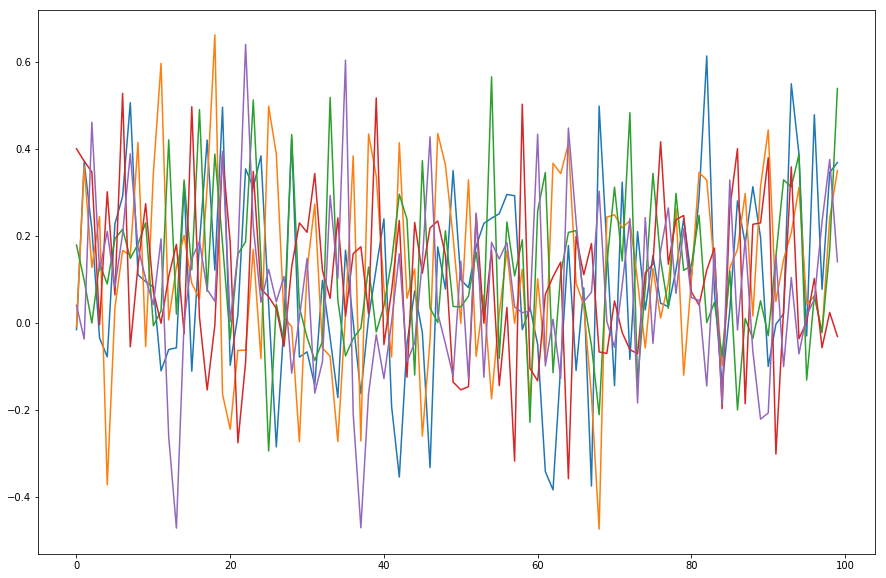

In [53]:
plt.plot(returns)

On peut obtenir l'estimation de la matrice de covariance en utilisant la méthode [cov()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.cov.html)

In [105]:
print(returns.cov())

                    WIKI/AAPL - Close  WIKI/MCD - Close  WIKI/MSFT - Close  \
WIKI/AAPL - Close            0.000172          0.000025           0.000076   
WIKI/MCD - Close             0.000025          0.000081           0.000039   
WIKI/MSFT - Close            0.000076          0.000039           0.000145   
WIKI/TGT - Close             0.000017          0.000016           0.000022   
WIKI/GE - Close              0.000032          0.000015           0.000034   
WIKI/AMZN - Close            0.000080          0.000036           0.000100   
WIKI/T - Close               0.000018          0.000008           0.000018   
WIKI/UPS - Close             0.000029          0.000019           0.000039   
WIKI/GM - Close              0.000041          0.000011           0.000045   
WIKI/IBM - Close             0.000029          0.000014           0.000043   
WIKI/PEP - Close             0.000023          0.000020           0.000030   
WIKI/VZ - Close              0.000011          0.000015         

Choisissons des poids au hasard. Il faut simplement faire attention à ce que la somme des poids fasse bien 1.

In [59]:
weights = np.random.random(nb_actifs)
weights = - np.log(weights)
weights /= np.sum(weights)
print(weights)

[ 0.1623561   0.0923771   0.19383666  0.10721798  0.44421216]


En utilisant les égalités que nous avons établies concernant l'espérance de rendement du portefeuille et son écart-type, on peut les calculer facilement en utilisant les possibilités matricielles de Python et de Numpy, notamment la méthode [np.dot()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) qui permet de faire le produit de deux matrices ou vecteurs :

In [61]:
E_p = np.sum(returns.mean() * weights)
sigma_p = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
print(E_p)
print(sigma_p)

0.0947767563951
0.110187384137


Il existe naturellement une infinité de portefeuilles possibles selon la pondération que l'on souhaite affecter à chacun des 5 actifs. Procédons à des simulations :

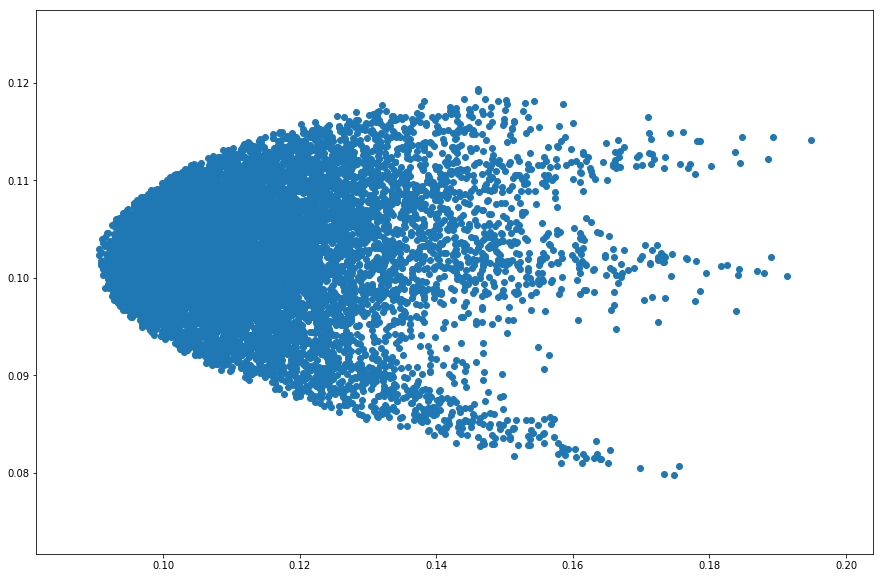

In [62]:
nb_simulations = 10000
rendements = []
sigmas = []

for p in range(nb_simulations):
    weights = np.random.random(nb_actifs) # Pas de possibilité de shorter un actif ici
    weights = - np.log(weights)
    weights /= np.sum(weights)
    E_p = np.sum(returns.mean() * weights)
    sigma_p = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
    
    rendements.append(E_p)
    sigmas.append(sigma_p)

rendements = np.array(rendements)
sigmas = np.array(sigmas)
plt.scatter(sigmas, rendements)

On peut décider de colorer les points selon le ratio de Sharpe des portefeuilles.

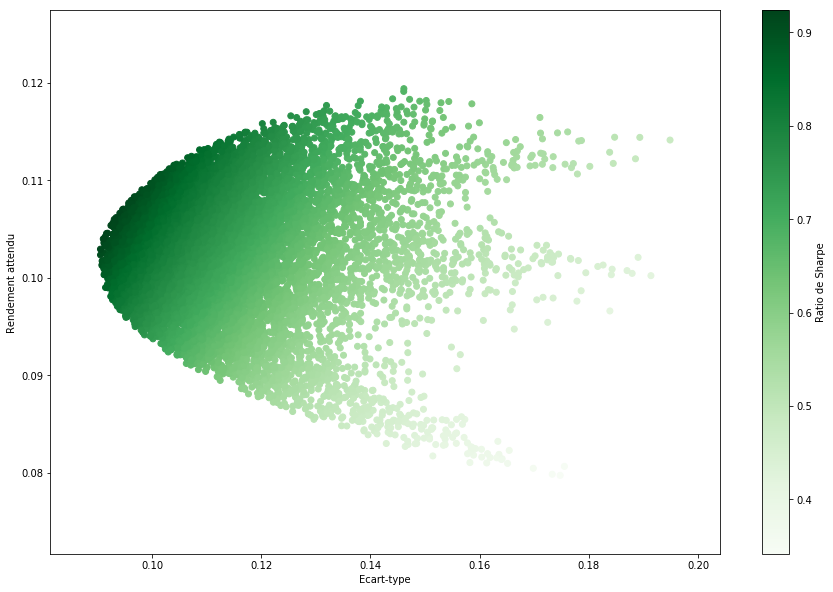

In [63]:
r_f = 0.02

sharpe_ratios = (rendements - np.array([r_f] * nb_simulations))/ sigmas

plt.scatter(sigmas, rendements, c=sharpe_ratios, cmap='Greens')
plt.xlabel('Ecart-type')
plt.ylabel('Rendement attendu')
plt.colorbar(label='Ratio de Sharpe')

Pour un niveau de rendement donné, il est possible de trouver un portefeuille d'actions dont le risque attendu est minimal :

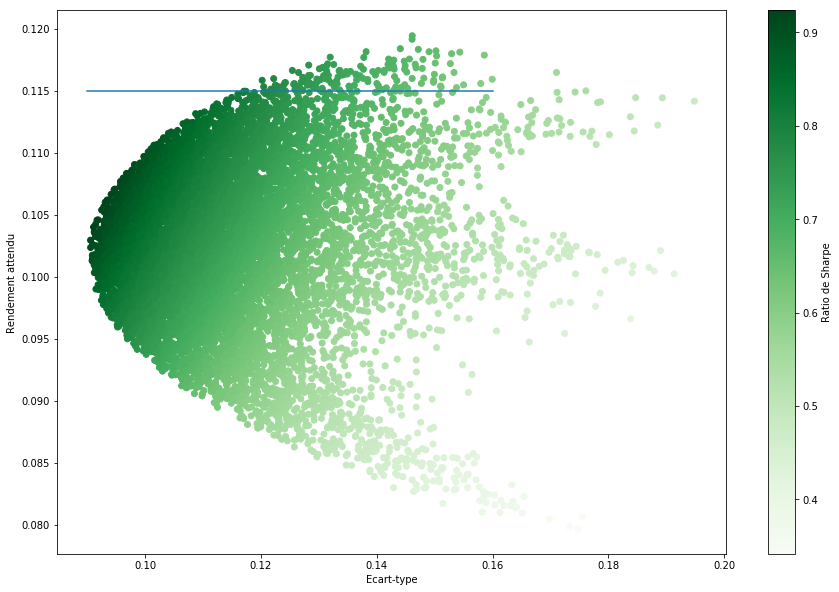

In [64]:
plt.plot([0.09, 0.16], [0.115, 0.115])

plt.scatter(sigmas, rendements, c=sharpe_ratios, cmap='Greens')
plt.xlabel('Ecart-type')
plt.ylabel('Rendement attendu')
plt.colorbar(label='Ratio de Sharpe')

De même, pour un niveau de risque attendu fixé, il est possible de trouver un portefeuille qui maximise le rendement attendu:

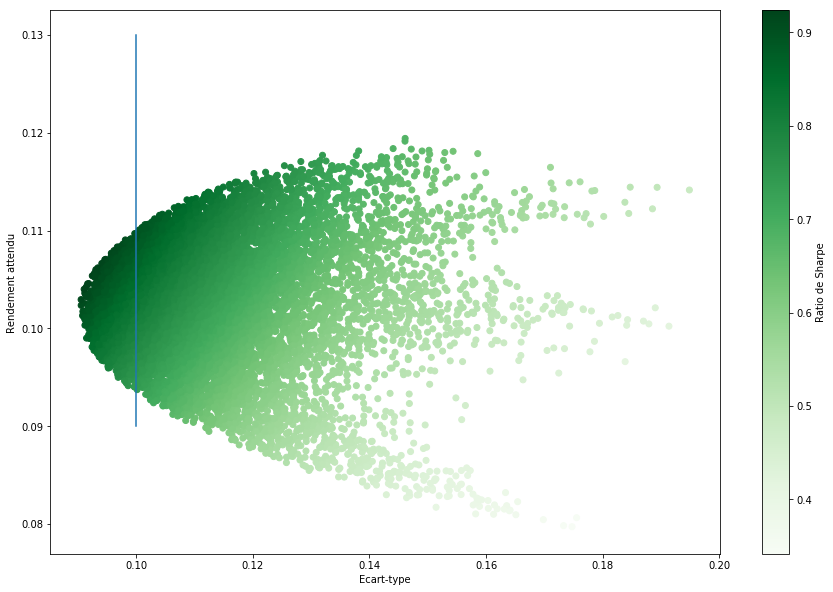

In [65]:
plt.plot([0.1, 0.1], [0.09, 0.13], )

plt.scatter(sigmas, rendements, c=sharpe_ratios, cmap='Greens')
plt.xlabel('Ecart-type')
plt.ylabel('Rendement attendu')
plt.colorbar(label='Ratio de Sharpe')

Il existe donc une frontière de portefeuille efficaces (*the efficient frontier*) parmi lesquels les choix doivent se restreindre si l'investisseur est bien préoccupé par le rendement et le risque attendus. Si d'autres préoccupations entrent en ligne de mire (comme le versement des dividendes, une liste noire de pays dans lesquels ne pas investir, etc.), le modèle doit être légèrement adapté.

En pratique, nous allons utiliser une nouvelle fois la methode la méthode [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

Définissons les fonctions à maximiser/minimiser. Lorsque l'on veut les maximiser, on prendra la version négative que l'on minimisera.

In [67]:
def min_rendement(weights):
    return(-np.sum(returns.mean() * weights))

def min_risque(weights):
    return(np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights))))

Il s'agit simplement d'appliquer la formule vu précédemment.

In [68]:
opts = scipy.optimize.minimize(min_risque, [0] * nb_actifs)

print(opts)

      fun: 0.0
 hess_inv: array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])
      jac: array([ 0.21571268,  0.21438659,  0.17885321,  0.18897914,  0.1955197 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 719
      nit: 0
     njev: 101
   status: 2
  success: False
        x: array([ 0.,  0.,  0.,  0.,  0.])


Problème : sans contrainte, l'optimisation nous renvoie nécessairement de n'investir dans rien. Il faut spécifier que la somme des poids est égale à 1. Pour spécifier une contrainte, on peut consulter la documentation de [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

In [69]:
def somme_poids_nulle(weights):
    return(np.sum(weights) - 1)

cons = {'type': 'eq', 'fun': somme_poids_nulle}

opts = scipy.optimize.minimize(min_risque, [0] * nb_actifs, constraints=cons)

print(opts)

     fun: 0.09023849852175247
     jac: array([ 0.09023064,  0.08996395,  0.09032024,  0.09029861,  0.09034642])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([ 0.13582757,  0.19478399,  0.18907393,  0.26660659,  0.21370792])


Le resultat nous donne parfois des poids négatif, ce qui est correct si l'on peut shorter certains actifs. Si l'on veut se restreindre au cas ou shorter n'est pas possible, il faut spécifier des bornes pour les poids; c'est l'argument *bounds* de minimize().

In [70]:
limites = [[0, 1] for i in range(nb_actifs)]
print(limites)

[[0, 1], [0, 1], [0, 1], [0, 1], [0, 1]]


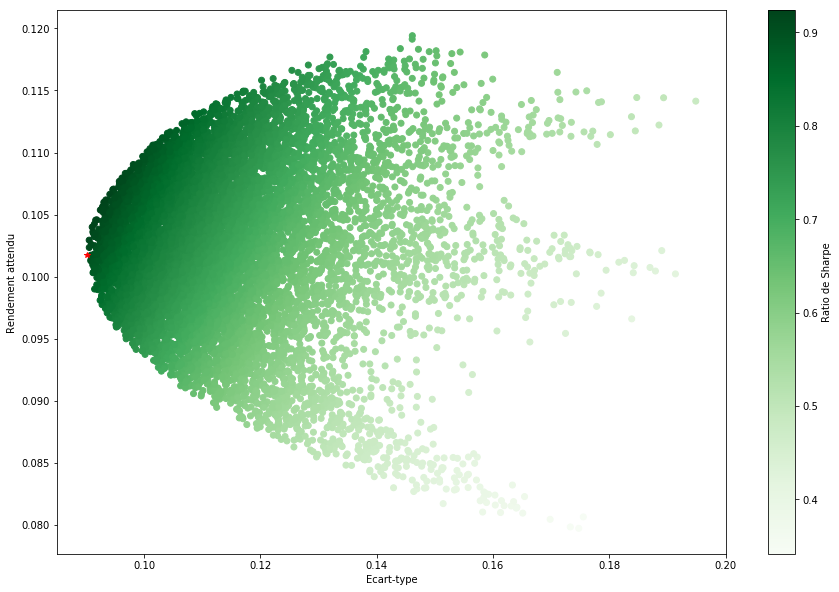

In [71]:
opts = scipy.optimize.minimize(min_risque, nb_actifs * [1 / nb_actifs], constraints=cons, bounds=limites)

rendement_optimal = -min_rendement(opts['x'])
sigma_optimal = opts['fun']

plt.plot(sigma_optimal, rendement_optimal, 'r*')
plt.scatter(sigmas, rendements, c=sharpe_ratios, cmap='Greens')
plt.xlabel('Ecart-type')
plt.ylabel('Rendement attendu')
plt.colorbar(label='Ratio de Sharpe')

Optimisons maintenant le rendement:

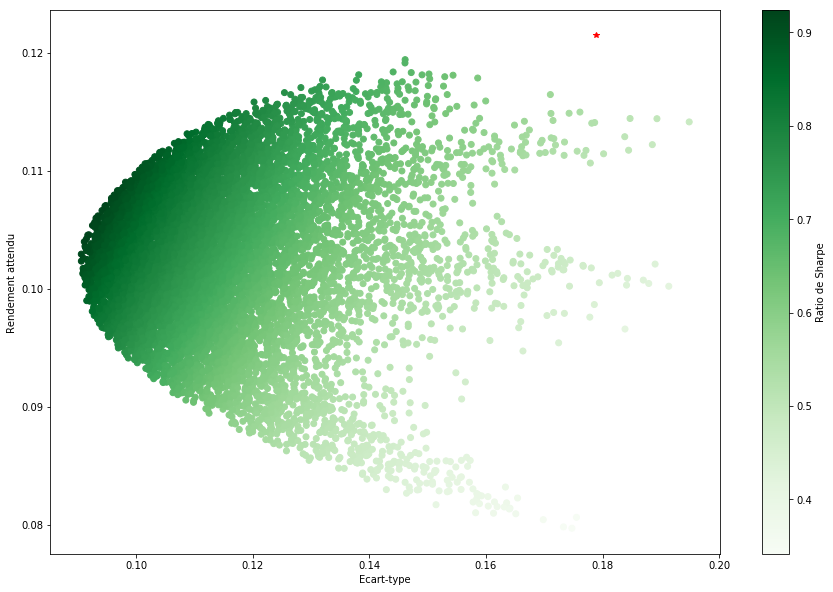

In [72]:
opts = scipy.optimize.minimize(min_rendement, nb_actifs * [1 / nb_actifs], constraints=cons, bounds=limites)

rendement_optimal = -min_rendement(opts['x'])
sigma_optimal = min_risque(opts['x'])

plt.plot(sigma_optimal, rendement_optimal, 'r*')
plt.scatter(sigmas, rendements, c=sharpe_ratios, cmap='Greens')
plt.xlabel('Ecart-type')
plt.ylabel('Rendement attendu')
plt.colorbar(label='Ratio de Sharpe')

Pour un niveau de rendement attendu fixé comme objectif de l'investisseur, il est dès lors possible de trouver le portefeuille le moins risqué. Pour cela, on ajoute simplement une contrainte supplémentaire, qui fixe un rendement maximum. Cette fois, la contrainte est une inégalité.

In [81]:
rendement_vise = 0.115

def rendement_fixe(weights):
    return(np.sum(returns.mean() * weights) - rendement_vise)

cons = [{'type': 'eq', 'fun': somme_poids_nulle},
        {'type': 'ineq', 'fun': rendement_fixe}]

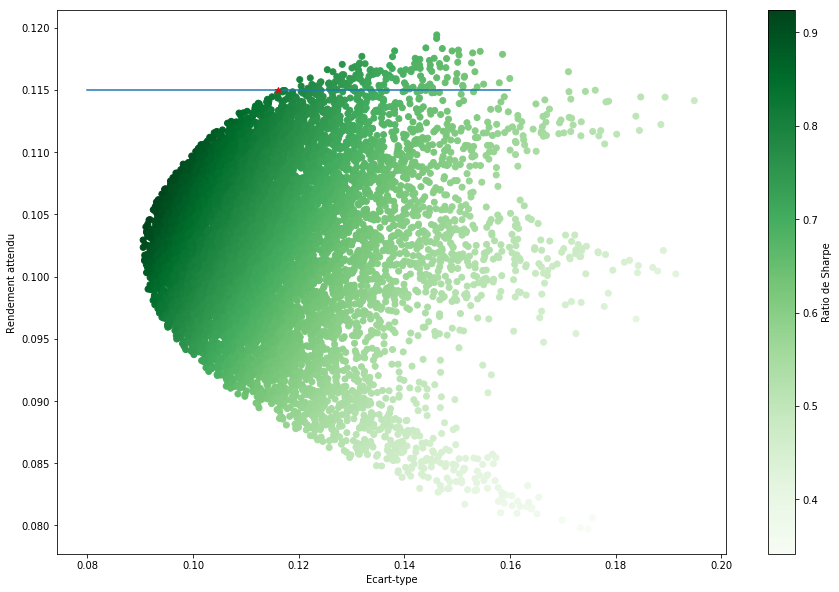

In [82]:
opts = scipy.optimize.minimize(min_risque, nb_actifs * [1 / nb_actifs], constraints=cons, bounds=limites)

rendement_optimal = -min_rendement(opts['x'])
sigma_optimal = min_risque(opts['x'])

plt.plot([0.08, 0.16], [rendement_vise, rendement_vise])
plt.plot(sigma_optimal, rendement_optimal, 'r*')
plt.scatter(sigmas, rendements, c=sharpe_ratios, cmap='Greens')
plt.xlabel('Ecart-type')
plt.ylabel('Rendement attendu')
plt.colorbar(label='Ratio de Sharpe')

A l'inverse, pour un niveau de risque maximum fixé, on peut obtenir le portefeuille avec le meilleur rendement.

In [77]:
risque_vise = 0.1

def risque_fixe(weights):
    return(risque_vise - np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights))))

cons = [{'type': 'eq', 'fun': somme_poids_nulle},
        {'type': 'ineq', 'fun': risque_fixe}]

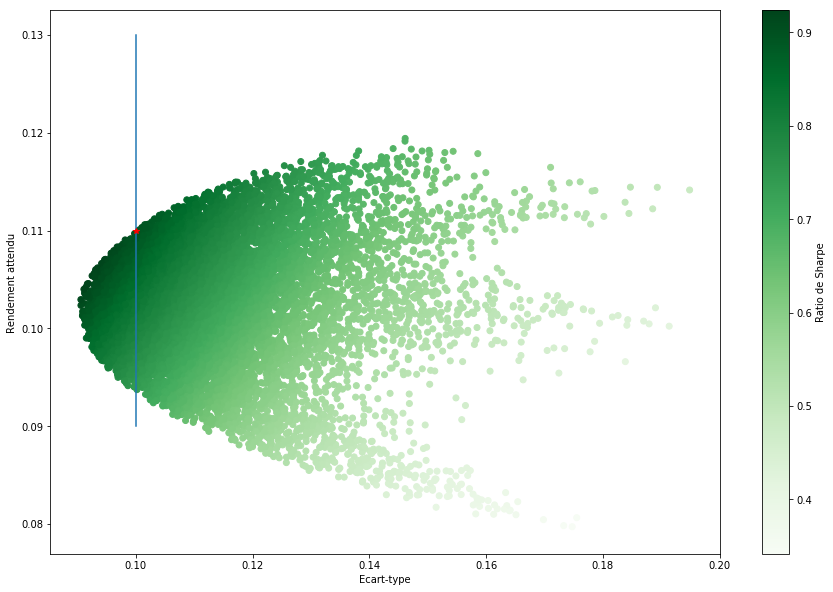

In [79]:
opts = scipy.optimize.minimize(min_rendement, nb_actifs * [1 / nb_actifs], constraints=cons, bounds=limites)

rendement_optimal = -opts['fun']
sigma_optimal = min_risque(opts['x'])

plt.plot([risque_vise, risque_vise], [0.09, 0.13], )
plt.plot(sigma_optimal, rendement_optimal, 'r*')
plt.scatter(sigmas, rendements, c=sharpe_ratios, cmap='Greens')
plt.xlabel('Ecart-type')
plt.ylabel('Rendement attendu')
plt.colorbar(label='Ratio de Sharpe')

Pour définir la frontière efficace, il ne reste plus qu'à reproduire cette opération pour un ensemble de rendements minimum / risques maximum. Commençons par les risques maximum:

In [83]:
risques_vises = np.arange(0.05, 0.13, 0.001)
rendements_optimaux = []
sigmas_optimaux = []

for risque_vise in risques_vises:
    
    cons = [{'type': 'eq', 'fun': somme_poids_nulle},
            {'type': 'ineq', 'fun': risque_fixe}]
    
    opts = scipy.optimize.minimize(min_rendement, nb_actifs * [1 / nb_actifs], constraints=cons, bounds=limites)

    rendements_optimaux.append(-opts['fun'])
    sigmas_optimaux.append(min_risque(opts['x']))

Text(0,0.5,'Rendement attendu')

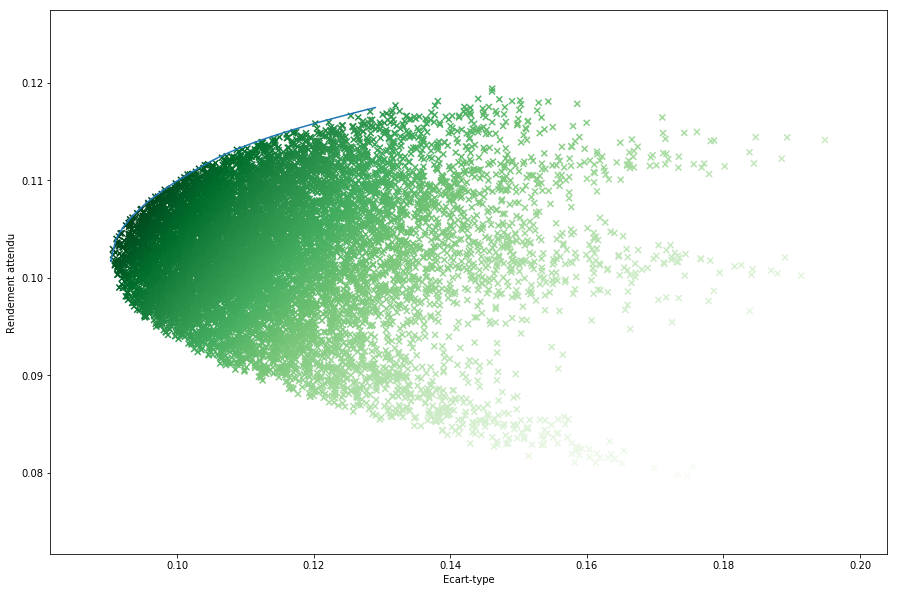

In [84]:
plt.scatter(sigmas, rendements, c=sharpe_ratios, cmap='Greens', marker='x')
plt.plot(sigmas_optimaux, rendements_optimaux)
plt.xlabel('Ecart-type')
plt.ylabel('Rendement attendu')
#plt.colorbar(label='Ratio de Sharpe')

On peut reproduire la même analyse avec les rendements.

In [85]:
rendements_vises = np.arange(0.10, 0.16, 0.001)
rendements_optimaux = []
sigmas_optimaux = []

for rendement_vise in rendements_vises:
    
    cons = [{'type': 'eq', 'fun': somme_poids_nulle},
            {'type': 'ineq', 'fun': rendement_fixe}]
    
    opts = scipy.optimize.minimize(min_risque, nb_actifs * [1 / nb_actifs], constraints=cons, bounds=limites, method='SLSQP')

    rendements_optimaux.append(-min_rendement(opts['x']))
    sigmas_optimaux.append(opts['fun'])

Text(0,0.5,'Rendement attendu')

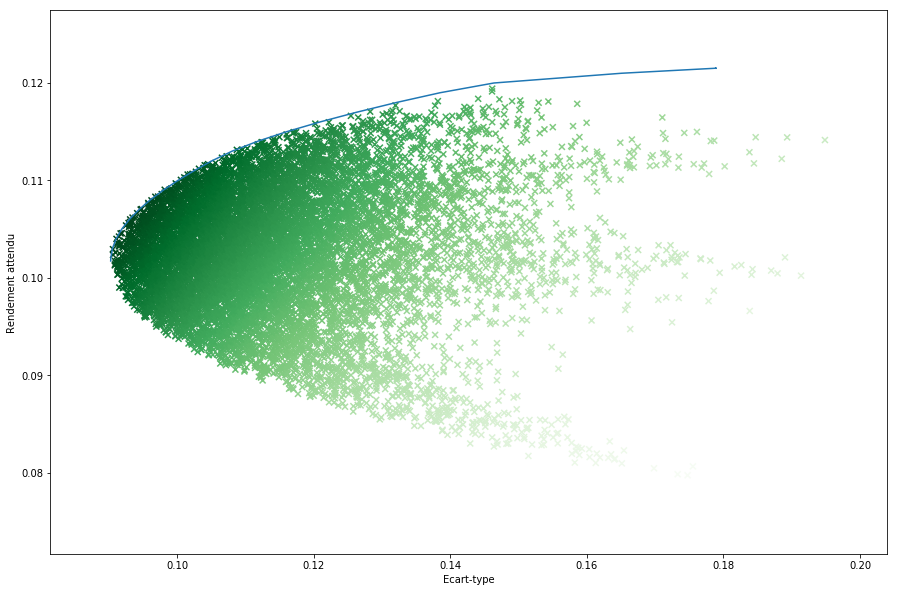

In [86]:
plt.scatter(sigmas, rendements, c=sharpe_ratios, cmap='Greens', marker='x')
plt.plot(sigmas_optimaux, rendements_optimaux)
plt.xlabel('Ecart-type')
plt.ylabel('Rendement attendu')
#plt.colorbar(label='Ratio de Sharpe')

### Diversification : le cas général avec un actif sans risque

Avec un actif sans risque, il s'agit de reproduire la même analyse que nous avons réalisée avec deux actifs. On cherche le portefeuille $p$ qui maximise le coefficient directeur de la droite d'allocation du capital, c'est-à-dire le ratio de Sharpe.

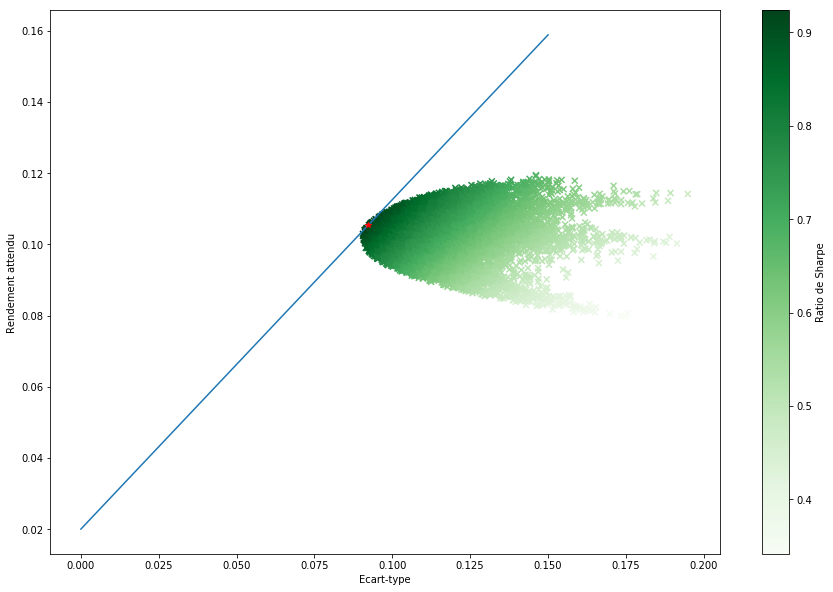

In [87]:
def min_sharpe(weights):
    rendement = np.sum(returns.mean() * weights)
    sigma = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
    return(-(rendement - r_f)/ sigma)

cons = {'type': 'eq', 'fun': somme_poids_nulle}

opts = scipy.optimize.minimize(min_sharpe, nb_actifs * [1 / nb_actifs], constraints=cons, bounds=limites, method='SLSQP')

sharpe_optimal = - opts['fun']
rendement_optimal = -min_rendement(opts['x'])
sigma_optimal = min_risque(opts['x'])

plt.plot([0, 0.15], [r_f, r_f + 0.15 * sharpe_optimal])
plt.plot(sigma_optimal, rendement_optimal, 'r*')
plt.scatter(sigmas, rendements, c=sharpe_ratios, cmap='Greens',  marker='x')
plt.xlabel('Ecart-type')
plt.ylabel('Rendement attendu')
plt.colorbar(label='Ratio de Sharpe')
plt.show()

Le théorème de séparation de Tobin nous dit que l'on peut d'abord établir le portefeuille optimal $p$, puis trouver l'allocation entre l'actif sans risque et ce portefeuille qui corresponde à l'aversion au risque de l'investisseur.
Il s'agit de trouver le niveau d'utilité U tel que la courbe d'indifférence associée à U soit tangeante à la droite d'allocation du capital. On va donc reproduire l'analyse vue avec deux actifs.

In [92]:
A_n = 20

U_p_etoile = (sharpe_optimal ** 2 ) / (2 * A_n) + r_f
sigma_p_etoile = sharpe_optimal / A_n
rendement_p_etoile = sharpe_optimal * sigma_p_etoile + r_f
U_courbe = [U_p_etoile + 0.5 * A_n * x ** 2 for x in np.arange(0, 0.15, 0.01)]

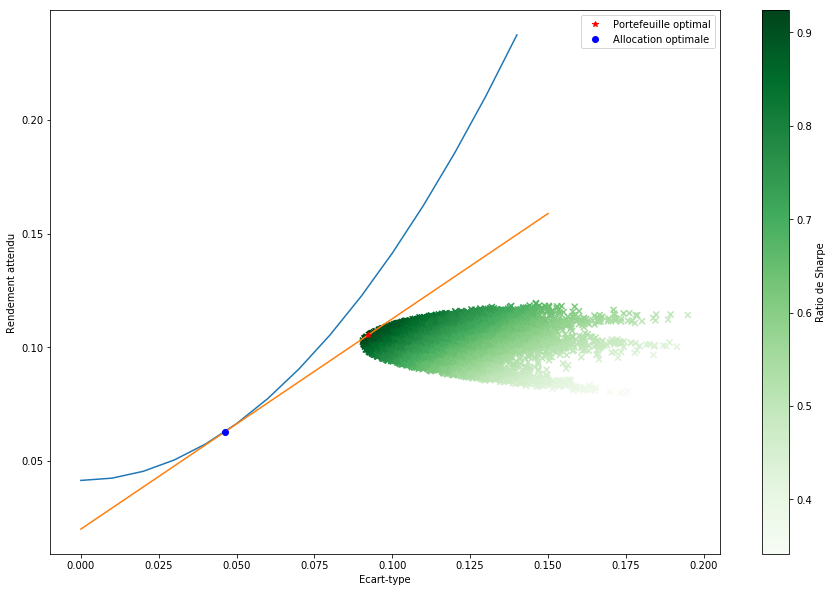

In [93]:
plt.plot(np.arange(0, 0.15, 0.01), U_courbe)
plt.plot([0, 0.15], [r_f, r_f + 0.15 * sharpe_optimal])
plt.plot(sigma_optimal, rendement_optimal, 'r*', label = 'Portefeuille optimal')
plt.scatter(sigmas, rendements, c=sharpe_ratios, cmap='Greens',  marker='x')
plt.plot([sigma_p_etoile], [rendement_p_etoile], 'ro', label='Allocation optimale', color="blue")
plt.xlabel('Ecart-type')
plt.ylabel('Rendement attendu')
plt.colorbar(label='Ratio de Sharpe')
plt.legend()
plt.show()

### Application à des données réelles

On va utiliser un fournissseur professionnel de données financières, [Quandl](https://www.quandl.com/). Quandl dispose de son propre package python pour rendre le téléchargement de données en Python très facile. (Un `pip3 install quandl` est nécessaire si vous êtes sur votre propre ordinateur). Une documentation complète sur le package Quandl est disponible [ici](https://docs.quandl.com/docs).

In [95]:
import quandl

ImportError: No module named 'quandl'

Comme la plupart des fournisseurs de données financières, vous aurez besoin de vous enregistrer et Quandl vous donnera une clé API, qui vous servira à accéder aux données depuis votre code (R, Python, etc.). Cette clé sert à limiter votre accès. Nous allons utiliser un accès gratuit. 

Une fois sur [Quandl](https://www.quandl.com/), clickez sur SIGN IN en haut à droite: inscrivez-vous, puis copiez-collez votre clé ci-dessous :

In [94]:
cle_API = "vV5n2kkCHA3mm-zKCwBQ"
quandl.ApiConfig.api_key = cle_API

NameError: name 'quandl' is not defined

Nous allons utiliser la base gratuite [WIKI](https://www.quandl.com/data/WIKI-Wiki-EOD-Stock-Prices/documentation/database-overview)

In [4]:
data = quandl.get('WIKI/AAPL', start_date = '2016-01-01')
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-01-04,102.61,105.368,102.00,105.35,67649387.0,0.0,1.0,99.136516,101.801154,98.547165,101.783763,67649387.0
2016-01-05,105.75,105.850,102.41,102.71,55790992.0,0.0,1.0,102.170223,102.266838,98.943286,99.233131,55790992.0
2016-01-06,100.56,102.370,99.87,100.70,68457388.0,0.0,1.0,97.155911,98.904640,96.489269,97.291172,68457388.0
2016-01-07,98.68,100.130,96.43,96.45,81094428.0,0.0,1.0,95.339552,96.740467,93.165717,93.185040,81094428.0
2016-01-08,98.55,99.110,96.76,96.96,70798016.0,0.0,1.0,95.213952,95.754996,93.484546,93.677776,70798016.0


Il suffit de spécifier un ticker symbol et une date de début, voire de fin. Les argument de get() sont disponible dans la  [documentation](https://docs.quandl.com/docs/parameters-2#section-times-series-parameters). On peut voir que l'argument optionnel `column_index` peut être utilisé pour sélectionner la quatrième colonne, celle qui nous intéresse ici.

In [53]:
data = quandl.get('WIKI/AAPL', start_date = '2016-01-01', column_index = 4)
data.head()

,Close
Date,
2016-01-04,105.35
2016-01-05,102.71
2016-01-06,100.70
2016-01-07,96.45
2016-01-08,96.96


La première étape est de sélectionner les actions disponibles pour l'analyse. Pour l'exemple, nous allons nous restreindre à une dizaine d'actions américaines; cependant l'analyse peut-etre conduite sur un très grand nombre de produits financiers. N'hésitez pas à modifier cette liste en ajoutant / supprimant des ticker symbols. Toutes les bases de Quandl vous sont ouvertes.

In [5]:
liste_actions = ['WIKI/AAPL', 'WIKI/MCD', 'WIKI/MSFT', 'WIKI/TGT', 'WIKI/GE', 'WIKI/AMZN', 
               'WIKI/T', 'WIKI/UPS', 'WIKI/GM', 'WIKI/IBM', 'WIKI/PEP', 'WIKI/VZ', 
               'WIKI/DIS', 'WIKI/INTC', 'WIKI/F', 'WIKI/CMCSA']
#liste_actions = ['WIKI/AAPL', 'WIKI/MCD', 'WIKI/MSFT', 'WIKI/AMZN', 'WIKI/UPS']

nb_actifs = len(liste_actions)

data = quandl.get(liste_actions, start_date = '2015-01-01', column_index = 4)

In [6]:
returns = data.pct_change()
returns.tail()

,WIKI/AAPL - Close,WIKI/MCD - Close,WIKI/MSFT - Close,WIKI/TGT - Close,WIKI/GE - Close,WIKI/AMZN - Close,WIKI/T - Close,WIKI/UPS - Close,WIKI/GM - Close,WIKI/IBM - Close,WIKI/PEP - Close,WIKI/VZ - Close,WIKI/DIS - Close,WIKI/INTC - Close,WIKI/F - Close,WIKI/CMCSA - Close
Date,,,,,,,,,,,,,,,,
2018-01-29,-0.020699,-0.003308,-0.001488,-0.001949,0.009299,0.011148,-0.014807,-0.015672,-0.010807,-0.003227,-0.017165,-0.010782,-0.005794,-0.001997,-0.045494,-0.019159
2018-01-30,-0.005894,-0.029758,-0.012564,-0.022135,-0.020270,0.014206,0.004831,-0.019366,-0.007438,-0.019065,0.001838,-0.004249,-0.012821,-0.023810,-0.005396,0.008576
2018-01-31,0.002755,-0.007769,0.024477,0.001598,0.013793,0.009619,0.000267,-0.006167,-0.006792,0.000489,0.003420,0.003154,-0.013078,-0.013322,-0.008137,0.004487
2018-02-01,0.002090,0.004441,-0.007894,-0.003324,-0.009276,-0.042469,0.045661,-0.061342,0.000472,-0.007941,0.000000,0.004254,0.016748,-0.010179,-0.004558,-0.015048
2018-02-02,-0.044165,-0.014660,-0.026310,-0.026944,-0.023720,0.029496,-0.027835,-0.025437,-0.033703,-0.020751,-0.013549,-0.024309,-0.016201,-0.031480,-0.019231,-0.018620


Grace à tout ce que l'on a vu précédemment, réaliser une optimisation de portefeuille selon les principes de Markowitz et Tobin est immédiat.

In [9]:
r_f = 0
A_n = 10

def min_sharpe(weights):
    rendement = np.sum(returns.mean() * weights)
    sigma = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
    return(-(rendement - r_f)/ sigma)

def somme_poids_nulle(weights):
    return(np.sum(weights) - 1)

limites = [[0, 1] for i in range(nb_actifs)]

cons = {'type': 'eq', 'fun': somme_poids_nulle}

opts = scipy.optimize.minimize(min_sharpe, nb_actifs * [1 / nb_actifs], constraints=cons, bounds=limites, method='SLSQP')

weights = opts['x']
sharpe_optimal = - opts['fun']
rendement_optimal = np.sum(returns.mean() * weights)
sigma_optimal = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))

U_p_etoile = (sharpe_optimal ** 2 ) / (2 * A_n) + r_f
sigma_p_etoile = sharpe_optimal / A_n
rendement_p_etoile = sharpe_optimal * sigma_p_etoile + r_f

Il suffit de retourner a ..

In [11]:
print("Le portefeuille optimal est le suivant: \n")
for action, poids in zip(liste_actions, weights):
    print(action + " : " + str(poids))

Le portefeuille optimal est le suivant: 

WIKI/AAPL : 5.13739900517e-18
WIKI/MCD : 0.453161575546
WIKI/MSFT : 0.0
WIKI/TGT : 0.0
WIKI/GE : 0.0
WIKI/AMZN : 0.546838424454
WIKI/T : 0.0
WIKI/UPS : 3.38929474771e-18
WIKI/GM : 0.0
WIKI/IBM : 2.32947562653e-19
WIKI/PEP : 0.0
WIKI/VZ : 0.0
WIKI/DIS : 0.0
WIKI/INTC : 0.0
WIKI/F : 3.70546383279e-17
WIKI/CMCSA : 4.09606042843e-17


In [12]:
print("On alloue " + str(100 * sigma_p_etoile / sigma_optimal) 
      + "% du capital sur ce portefeuille, et le reste dans l'actif sans risque.\n")
print("Le rendement attendu est de " + str(rendement_p_etoile) 
      + " pour un écart-type attendu de " + str(sigma_p_etoile))

On alloue 105.20262419% du capital sur ce portefeuille, et le reste dans l'actif sans risque.

Le rendement attendu est de 0.0016220050893823832 pour un écart-type attendu de 0.012735796360582965


In [26]:
nb_simulations = 100000
rendements = []
sigmas = []
poids_liste = []

for p in range(nb_simulations):
    weights = np.random.random(nb_actifs) # Pas de possibilité de shorter un actif ici
    weights = - np.log(weights)
    weights /= np.sum(weights)
    E_p = np.sum(returns.mean() * weights)
    sigma_p = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
    
    rendements.append(E_p)
    sigmas.append(sigma_p)

rendements = np.array(rendements)
sigmas = np.array(sigmas)
sharpe_ratios = (rendements - np.array([r_f] * nb_simulations))/ sigmas

KeyboardInterrupt: 

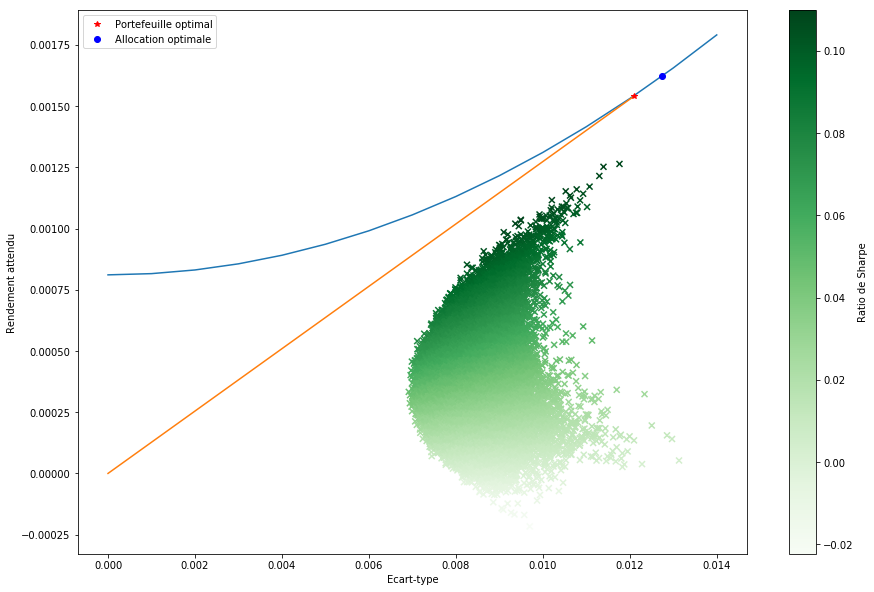

In [25]:
x_list = np.arange(0, 0.015, 0.001)
U_courbe = [U_p_etoile + 0.5 * A_n * x ** 2 for x in x_list]
plt.plot(x_list, U_courbe)
plt.plot([0, sigma_optimal], [r_f, rendement_optimal])
plt.plot(sigma_optimal, rendement_optimal, 'r*', label = 'Portefeuille optimal')
plt.scatter(sigmas, rendements, c=sharpe_ratios, cmap='Greens',  marker='x')
plt.plot([sigma_p_etoile], [rendement_p_etoile], 'ro', label='Allocation optimale', color="blue")
plt.xlabel('Ecart-type')
plt.ylabel('Rendement attendu')
plt.colorbar(label='Ratio de Sharpe')
plt.legend()

In [21]:
weights = np.random.random(5)
weights = - np.log(weights)
weights /= np.sum(weights)